In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 

# 범주형 수치형 인코딩 및 정규화 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [2]:
from math import sqrt
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

keras = tf.keras

In [3]:
# 한글 표기를 위한 처리
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [4]:
# 데이터 로드
# df = pd.read_csv('../data/train.csv')
df = pd.read_csv('../data/final_data2.csv')
df.head()

date  배추_거래량(kg)  배추_가격(원/kg)_배추  rain_sum_1q_배추  \
0  2016-01-01         0.0             0.0           249.5   
1  2016-01-02     80860.0           329.0           233.1   
2  2016-01-03         0.0             0.0           232.6   
3  2016-01-04   1422742.5           478.0           232.6   
4  2016-01-05   1167241.0           442.0           232.6   

   heavy_rain_count_1q_배추  low_temp_count_1q_배추  middle_temp_count_1q_배추  \
0                     0.0                   0.0                     21.0   
1                     0.0                   1.0                     21.0   
2                     0.0                   1.0                     21.0   
3                     0.0                   1.0                     21.0   
4                     0.0                   1.0                     21.0   

   high_temp_count_1q_배추  avg_temp_1q_배추  avg_max_Temp_1q_배추  ...  \
0                    0.0       21.116667           26.186667  ...   
1                    0.0       20.313333           25.496667  ...   
2                    0.0       19.596667           24.846667  ...   
3                    0.0       18.903333           24.323333  ...   
4                    0.0       18.240000           23.700000  ...   

   avg_widdir_12q_샤인마스캇  avg_wind_12q_샤인마스캇  avg_rain_12q_샤인마스캇  \
0            185.826667            0.403333                0.35   
1            188.796667            0.406667                0.35   
2            183.560000            0.396667                0.35   
3            189.790000            0.396667                0.35   
4            188.196667            0.406667                0.10   

   avg_sun_Time_12q_샤인마스캇  avg_sun_Qy_12q_샤인마스캇  avg_condens_Time_12q_샤인마스캇  \
0              381.600000             13.110000                  516.766667   
1              381.800000             12.956667                  517.633333   
2              391.966667             12.980000                  525.800000   
3              403.000000             13.066667                  549.866667   
4              419.633333             13.396667                  537.600000   

   avg_gr_Temp_12q_샤인마스캇  avg_soil_Temp_12q_샤인마스캇  avg_soil_Wt_12q_샤인마스캇  \
0                    NaN                18.640333              19.090000   
1                    NaN                18.417000              18.673333   
2                    NaN                18.191667              18.286667   
3                    NaN                17.968667              17.910000   
4                    NaN                17.757667              17.510000   

    Dubai  
0     NaN  
1     NaN  
2     NaN  
3  239.87  
4  235.84  

[5 rows x 4580 columns]

In [5]:
# 불러온 데이터 카피 
cp_df = df.copy()

In [6]:
cp_df.shape

(1733, 4580)

In [7]:
col_list = cp_df.columns
print(col_list)

Index(['date', '배추_거래량(kg)', '배추_가격(원/kg)_배추', 'rain_sum_1q_배추',
       'heavy_rain_count_1q_배추', 'low_temp_count_1q_배추',
       'middle_temp_count_1q_배추', 'high_temp_count_1q_배추', 'avg_temp_1q_배추',
       'avg_max_Temp_1q_배추',
       ...
       'avg_widdir_12q_샤인마스캇', 'avg_wind_12q_샤인마스캇', 'avg_rain_12q_샤인마스캇',
       'avg_sun_Time_12q_샤인마스캇', 'avg_sun_Qy_12q_샤인마스캇',
       'avg_condens_Time_12q_샤인마스캇', 'avg_gr_Temp_12q_샤인마스캇',
       'avg_soil_Temp_12q_샤인마스캇', 'avg_soil_Wt_12q_샤인마스캇', 'Dubai'],
      dtype='object', length=4580)


In [8]:
print(cp_df.isna().sum())

date                             0
배추_거래량(kg)                       0
배추_가격(원/kg)_배추                   0
rain_sum_1q_배추                   0
heavy_rain_count_1q_배추           0
                              ... 
avg_condens_Time_12q_샤인마스캇       0
avg_gr_Temp_12q_샤인마스캇         1733
avg_soil_Temp_12q_샤인마스캇          0
avg_soil_Wt_12q_샤인마스캇         1144
Dubai                          510
Length: 4580, dtype: int64


In [9]:
cp_df=cp_df.fillna(0)

In [10]:
print(cp_df.isna().sum())

date                          0
배추_거래량(kg)                    0
배추_가격(원/kg)_배추                0
rain_sum_1q_배추                0
heavy_rain_count_1q_배추        0
                             ..
avg_condens_Time_12q_샤인마스캇    0
avg_gr_Temp_12q_샤인마스캇         0
avg_soil_Temp_12q_샤인마스캇       0
avg_soil_Wt_12q_샤인마스캇         0
Dubai                         0
Length: 4580, dtype: int64


In [11]:
cp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Columns: 4580 entries, date to Dubai
dtypes: float64(4579), object(1)
memory usage: 60.6+ MB


In [12]:
cp_df[cp_df['date'].isna()]

Empty DataFrame
Columns: [date, 배추_거래량(kg), 배추_가격(원/kg)_배추, rain_sum_1q_배추, heavy_rain_count_1q_배추, low_temp_count_1q_배추, middle_temp_count_1q_배추, high_temp_count_1q_배추, avg_temp_1q_배추, avg_max_Temp_1q_배추, avg_min_Temp_1q_배추, avg_hum_1q_배추, avg_widdir_1q_배추, avg_wind_1q_배추, avg_rain_1q_배추, avg_sun_Time_1q_배추, avg_sun_Qy_1q_배추, avg_condens_Time_1q_배추, avg_gr_Temp_1q_배추, avg_soil_Temp_1q_배추, avg_soil_Wt_1q_배추, rain_sum_2q_배추, heavy_rain_count_2q_배추, low_temp_count_2q_배추, middle_temp_count_2q_배추, high_temp_count_2q_배추, avg_temp_2q_배추, avg_max_Temp_2q_배추, avg_min_Temp_2q_배추, avg_hum_2q_배추, avg_widdir_2q_배추, avg_wind_2q_배추, avg_rain_2q_배추, avg_sun_Time_2q_배추, avg_sun_Qy_2q_배추, avg_condens_Time_2q_배추, avg_gr_Temp_2q_배추, avg_soil_Temp_2q_배추, avg_soil_Wt_2q_배추, rain_sum_3q_배추, heavy_rain_count_3q_배추, low_temp_count_3q_배추, middle_temp_count_3q_배추, high_temp_count_3q_배추, avg_temp_3q_배추, avg_max_Temp_3q_배추, avg_min_Temp_3q_배추, avg_hum_3q_배추, avg_widdir_3q_배추, avg_wind_3q_배추, avg_rain_3q_배추, avg_sun_Time_3q_배추, avg_sun_Qy_3q_배추, avg_condens_Time_3q_배추, avg_gr_Temp_3q_배추, avg_soil_Temp_3q_배추, avg_soil_Wt_3q_배추, rain_sum_4q_배추, heavy_rain_count_4q_배추, low_temp_count_4q_배추, middle_temp_count_4q_배추, high_temp_count_4q_배추, avg_temp_4q_배추, avg_max_Temp_4q_배추, avg_min_Temp_4q_배추, avg_hum_4q_배추, avg_widdir_4q_배추, avg_wind_4q_배추, avg_rain_4q_배추, avg_sun_Time_4q_배추, avg_sun_Qy_4q_배추, avg_condens_Time_4q_배추, avg_gr_Temp_4q_배추, avg_soil_Temp_4q_배추, avg_soil_Wt_4q_배추, rain_sum_5q_배추, heavy_rain_count_5q_배추, low_temp_count_5q_배추, middle_temp_count_5q_배추, high_temp_count_5q_배추, avg_temp_5q_배추, avg_max_Temp_5q_배추, avg_min_Temp_5q_배추, avg_hum_5q_배추, avg_widdir_5q_배추, avg_wind_5q_배추, avg_rain_5q_배추, avg_sun_Time_5q_배추, avg_sun_Qy_5q_배추, avg_condens_Time_5q_배추, avg_gr_Temp_5q_배추, avg_soil_Temp_5q_배추, avg_soil_Wt_5q_배추, rain_sum_6q_배추, heavy_rain_count_6q_배추, low_temp_count_6q_배추, middle_temp_count_6q_배추, high_temp_count_6q_배추, avg_temp_6q_배추, avg_max_Temp_6q_배추, ...]
Index: []

[0 rows x 4580 columns]

In [13]:
# cp_df[cp_df.isnull()]

# 간단한 EDA 시각화 

In [14]:
# 데이터 결측치 확인
# for col in df.columns:
#     print('column : {0} \t\t 결측치 : {1}'.format(col, df[col].isnull().sum()))

In [15]:
# 이상치에 대한 처리 방안 ? 

In [16]:
label_col_list = []
for col in col_list:
    if '가격' in col:
        label_col_list.append(col)

print(len(label_col_list))

21


# 전처리


In [17]:
# 요일 범주형 > 라벨인코딩 처리
# le = LabelEncoder()
# le.fit(cp_df.iloc[:, 1])
# cp_df['요일']=le.transform(cp_df.iloc[:, 1])

In [18]:
cp_df.head(5)

date  배추_거래량(kg)  배추_가격(원/kg)_배추  rain_sum_1q_배추  \
0  2016-01-01         0.0             0.0           249.5   
1  2016-01-02     80860.0           329.0           233.1   
2  2016-01-03         0.0             0.0           232.6   
3  2016-01-04   1422742.5           478.0           232.6   
4  2016-01-05   1167241.0           442.0           232.6   

   heavy_rain_count_1q_배추  low_temp_count_1q_배추  middle_temp_count_1q_배추  \
0                     0.0                   0.0                     21.0   
1                     0.0                   1.0                     21.0   
2                     0.0                   1.0                     21.0   
3                     0.0                   1.0                     21.0   
4                     0.0                   1.0                     21.0   

   high_temp_count_1q_배추  avg_temp_1q_배추  avg_max_Temp_1q_배추  ...  \
0                    0.0       21.116667           26.186667  ...   
1                    0.0       20.313333           25.496667  ...   
2                    0.0       19.596667           24.846667  ...   
3                    0.0       18.903333           24.323333  ...   
4                    0.0       18.240000           23.700000  ...   

   avg_widdir_12q_샤인마스캇  avg_wind_12q_샤인마스캇  avg_rain_12q_샤인마스캇  \
0            185.826667            0.403333                0.35   
1            188.796667            0.406667                0.35   
2            183.560000            0.396667                0.35   
3            189.790000            0.396667                0.35   
4            188.196667            0.406667                0.10   

   avg_sun_Time_12q_샤인마스캇  avg_sun_Qy_12q_샤인마스캇  avg_condens_Time_12q_샤인마스캇  \
0              381.600000             13.110000                  516.766667   
1              381.800000             12.956667                  517.633333   
2              391.966667             12.980000                  525.800000   
3              403.000000             13.066667                  549.866667   
4              419.633333             13.396667                  537.600000   

   avg_gr_Temp_12q_샤인마스캇  avg_soil_Temp_12q_샤인마스캇  avg_soil_Wt_12q_샤인마스캇  \
0                    0.0                18.640333              19.090000   
1                    0.0                18.417000              18.673333   
2                    0.0                18.191667              18.286667   
3                    0.0                17.968667              17.910000   
4                    0.0                17.757667              17.510000   

    Dubai  
0    0.00  
1    0.00  
2    0.00  
3  239.87  
4  235.84  

[5 rows x 4580 columns]

In [19]:
# MinMaxScaler 정규화 
minmax = MinMaxScaler()
minmax.fit(cp_df.iloc[:, 1:])
cp_df.iloc[:, 1:]=minmax.transform(cp_df.iloc[:, 1:])
# robust = RobustScaler()
# robust.fit(df.iloc[:, 2:])
# df.iloc[:, 2:]=minmax.transform(df.iloc[:, 2:])

In [20]:
# train set => date 를 제외 
input_col_list = cp_df.iloc[:, 1:].columns 
# ytrain set => date 요일 거래량을 제외 하고 가격 컬럼만 추출 
# label_col_list = cp_df.iloc[:, 3::2].columns

In [21]:
print(cp_df.shape)
print("label_col_list", len(label_col_list))
print("input_col_list", len(input_col_list))

(1733, 4580)
label_col_list 21
input_col_list 4579


In [22]:
# baseline 하이퍼파라미터(참고용)
# device = torch.device("cuda:0")         # GPU 사용
# target_n = 21                           # 맞춰야하는 품목/품종의 수
# learning_rate = 5e-4                    # 학습률
# BATCH_SIZE = 128                        # 배치사이즈
# EPOCHS = 50                             # 총 eopochs
# teacher_forcing = False                 # 교사강요 설정
# n_layers = 3                            # rnn레이어 층
# dropout = 0.2                           # 드롭아웃
# window_size = 7                         # 인코더 시퀀스 길이
# future_size = 7                         # 디코더 시퀀스 길이
# hidden_dim = 128                        # rnn 히든차원
# save_path = f'./models/best_model.pt'   # 모델 저장 경로

In [23]:
cp_df.head(5)

date  배추_거래량(kg)  배추_가격(원/kg)_배추  rain_sum_1q_배추  \
0  2016-01-01    0.000000          0.0000        0.473884   
1  2016-01-02    0.015520          0.0658        0.442735   
2  2016-01-03    0.000000          0.0000        0.441785   
3  2016-01-04    0.273068          0.0956        0.441785   
4  2016-01-05    0.224029          0.0884        0.441785   

   heavy_rain_count_1q_배추  low_temp_count_1q_배추  middle_temp_count_1q_배추  \
0                     0.0              0.000000                 0.724138   
1                     0.0              0.033333                 0.724138   
2                     0.0              0.033333                 0.724138   
3                     0.0              0.033333                 0.724138   
4                     0.0              0.033333                 0.724138   

   high_temp_count_1q_배추  avg_temp_1q_배추  avg_max_Temp_1q_배추  ...  \
0                    0.0        0.739884            0.712751  ...   
1                    0.0        0.713600            0.690955  ...   
2                    0.0        0.690152            0.670422  ...   
3                    0.0        0.667466            0.653891  ...   
4                    0.0        0.645763            0.634200  ...   

   avg_widdir_12q_샤인마스캇  avg_wind_12q_샤인마스캇  avg_rain_12q_샤인마스캇  \
0              0.388513            0.053061            0.013661   
1              0.408534            0.055102            0.013661   
2              0.373233            0.048980            0.013661   
3              0.415230            0.048980            0.013661   
4              0.404490            0.055102            0.003415   

   avg_sun_Time_12q_샤인마스캇  avg_sun_Qy_12q_샤인마스캇  avg_condens_Time_12q_샤인마스캇  \
0                0.558198              0.537883                    0.707835   
1                0.558603              0.531592                    0.709022   
2                0.579207              0.532549                    0.720208   
3                0.601567              0.536105                    0.753173   
4                0.635277              0.549644                    0.736371   

   avg_gr_Temp_12q_샤인마스캇  avg_soil_Temp_12q_샤인마스캇  avg_soil_Wt_12q_샤인마스캇  \
0                    0.0                 0.641841               0.686526   
1                    0.0                 0.633664               0.671542   
2                    0.0                 0.625415               0.657636   
3                    0.0                 0.617251               0.644090   
4                    0.0                 0.609526               0.629705   

      Dubai  
0  0.000000  
1  0.000000  
2  0.000000  
3  0.404543  
4  0.397747  

[5 rows x 4580 columns]

In [24]:
# cp_df.tail(171)

In [25]:
# window_size = 14
# future_size = 14

# # 과거 28일의 변화를 보고 미래 28일을 예측
# x_data = []
# y_data = []

# print("전처리 데이터 확인 : cp_df.shape:{0}\twindows_size:{1}\tfuture_size:{2}\ndata.shape[0]-window_size-future_size:{3}".format(cp_df.shape[0], window_size, future_size, cp_df.shape[0]-window_size-future_size))
# for i in range(cp_df.shape[0]-window_size-future_size):
#     x = cp_df.iloc[i:i+window_size, 1:].to_numpy()
#     y = cp_df.iloc[i+window_size:i+window_size+future_size, 3::2].to_numpy()
#     # y_0 = np.zeros([1, y.shape[1]]) # 디코더 첫 입력값 추가
#     x_data.append(x)
#     # y_data.append(np.concatenate([y_0, y], axis=0))
#     y_data.append(y)

In [26]:
# 56 line 제외 
# label size 21 
# input size 43
# shift 28 > 28일 한 묶음 

# LSTM
# 20일치 데이터를 가지고 다음 가격을 예측
def custom_window_dataset(arg_df, arg_shift=20):
    features = arg_df.iloc[:, 1:].copy()
    
    reframe_dt = pd.DataFrame()
    for sft in range(arg_shift, 0, -1):
        shift_dt = features.shift(periods=sft, axis=0)
        shift_dt.reset_index(drop=True, inplace=True)
        reframe_dt.reset_index(drop=True, inplace=True)
        tmp_df = pd.concat([reframe_dt, shift_dt], axis=1)
        reframe_dt = tmp_df.copy()
        
    new_colnm = [col + '_tg' for col in features.loc[:, label_col_list].columns]

    # shift를 한 데이터와 합쳐서 예측값을 생성
    features_df = pd.DataFrame(features.loc[:, label_col_list].values, columns=new_colnm)
    temp_df = pd.concat([reframe_dt, features_df], axis=1)
    # print(features_df)
    # print(temp_df)
    # NaN 값의 row를 제거
    reframed = temp_df.dropna().copy()
    
    return reframed

In [27]:
# 파라미터 정의
WINDOW_SIZE = 28   # tiemstamp

label_len = len(label_col_list)
features_len = len(input_col_list)

In [28]:
reframed_df = custom_window_dataset(cp_df, WINDOW_SIZE)
# print(reframed_df.shape)

In [29]:
reframed_df.head()

배추_거래량(kg)  배추_가격(원/kg)_배추  rain_sum_1q_배추  heavy_rain_count_1q_배추  \
28    0.000000          0.0000        0.473884                     0.0   
29    0.015520          0.0658        0.442735                     0.0   
30    0.000000          0.0000        0.441785                     0.0   
31    0.273068          0.0956        0.441785                     0.0   
32    0.224029          0.0884        0.441785                     0.0   

    low_temp_count_1q_배추  middle_temp_count_1q_배추  high_temp_count_1q_배추  \
28              0.000000                 0.724138                    0.0   
29              0.033333                 0.724138                    0.0   
30              0.033333                 0.724138                    0.0   
31              0.033333                 0.724138                    0.0   
32              0.033333                 0.724138                    0.0   

    avg_temp_1q_배추  avg_max_Temp_1q_배추  avg_min_Temp_1q_배추  ...  \
28        0.739884            0.712751            0.766525  ...   
29        0.713600            0.690955            0.735699  ...   
30        0.690152            0.670422            0.710487  ...   
31        0.667466            0.653891            0.686441  ...   
32        0.645763            0.634200            0.660805  ...   

    당근_가격(원/kg)_당근_tg  파프리카_가격(원/kg)_파프리카_tg  새송이_가격(원/kg)_새송이_tg  \
28           0.233867               0.623095              0.80125   
29           0.232800               0.681369              0.79300   
30           0.266667               0.000000              0.79575   
31           0.237067               0.643081              0.86200   
32           0.232800               0.606402              0.84050   

    팽이버섯_가격(원/kg)_팽이버섯_tg  토마토_가격(원/kg)_토마토_tg  청상추_가격(원/kg)_청상추_tg  \
28               0.462161             0.408138             0.259159   
29               0.492534             0.403647             0.317432   
30               0.000000             0.000000             0.299059   
31               0.518097             0.420386             0.287050   
32               0.528474             0.393576             0.246984   

    백다다기_가격(원/kg)_백다다기_tg  애호박_가격(원/kg)_애호박_tg  캠벨얼리_가격(원/kg)_캠벨얼리_tg  \
28               0.578391             0.547507                0.13476   
29               0.637325             0.589112                0.13264   
30               0.656215             0.244320                0.00000   
31               0.733283             0.623930                0.13716   
32               0.767662             0.653290                0.10512   

    샤인마스캇_가격(원/kg)_샤인마스캇_tg  
28                      0.0  
29                      0.0  
30                      0.0  
31                      0.0  
32                      0.0  

[5 rows x 128233 columns]

In [30]:
label_col_list = []
for col in reframed_df.columns:
    if '_tg' in col:
        label_col_list.append(col)

In [31]:
print(label_col_list)

['배추_가격(원/kg)_배추_tg', '무_가격(원/kg)_무_tg', '양파_가격(원/kg)_양파_tg', '건고추_가격(원/kg)_건고추_tg', '마늘_가격(원/kg)_마늘_tg', '대파_가격(원/kg)_대파_tg', '얼갈이배추_가격(원/kg)_얼갈이배추_tg', '양배추_가격(원/kg)_양배추_tg', '깻잎_가격(원/kg)_깻잎_tg', '시금치_가격(원/kg)_시금치_tg', '미나리_가격(원/kg)_미나리_tg', '당근_가격(원/kg)_당근_tg', '파프리카_가격(원/kg)_파프리카_tg', '새송이_가격(원/kg)_새송이_tg', '팽이버섯_가격(원/kg)_팽이버섯_tg', '토마토_가격(원/kg)_토마토_tg', '청상추_가격(원/kg)_청상추_tg', '백다다기_가격(원/kg)_백다다기_tg', '애호박_가격(원/kg)_애호박_tg', '캠벨얼리_가격(원/kg)_캠벨얼리_tg', '샤인마스캇_가격(원/kg)_샤인마스캇_tg']


In [32]:
cp_df.shape, reframed_df.shape

((1733, 4580), (1705, 128233))

In [33]:
# 데이터 세트 분할 
# 훈련, 검증, 테스트 데이터 세트 (80, 10, 10) 
n = len(reframed_df)
train_df = reframed_df[0:int(n*0.8)]
val_df = reframed_df[int(n*0.8):int(n*0.9)]
test_df = reframed_df[int(n*0.9):]

num_features = reframed_df.shape[1]

In [34]:
# 분할 데이터 확인 
print(train_df.shape, val_df.shape, test_df.shape)
print(num_features)
print("label_col_list", len(label_col_list))
print("input_col_list", len(input_col_list))

(1364, 128233) (170, 128233) (171, 128233)
128233
label_col_list 21
input_col_list 4579


In [35]:
# x_train / y_train

In [36]:
# label_col_list = [col for col in train_df.columns if '_tg' in col]
# label_col_list

In [37]:
# 입력값과 출력값으로 분리
train_X, train_y = train_df.iloc[:, :features_len*WINDOW_SIZE], train_df.loc[:,label_col_list]
val_X, val_y = val_df.iloc[:, :features_len*WINDOW_SIZE], val_df.loc[:,label_col_list]
test_X, test_y = test_df.iloc[:, :features_len*WINDOW_SIZE], test_df.loc[:,label_col_list]

In [38]:
# 범위, 타임스탬프, 컬럼
train_X = train_X.values.reshape((train_X.shape[0], WINDOW_SIZE, features_len))
val_X = val_X.values.reshape((val_X.shape[0], WINDOW_SIZE, features_len))
test_X = test_X.values.reshape((test_X.shape[0], WINDOW_SIZE, features_len))

In [39]:
train_y = train_y.values.reshape((train_y.shape[0], 1, train_y.shape[1]))
val_y = val_y.values.reshape((val_y.shape[0], 1, val_y.shape[1]))
test_y = test_y.values.reshape((test_y.shape[0], 1, test_y.shape[1]))
# print(so_train_X.shape, train_y.shape, test_X.shape, test_y.shape)


In [40]:
print(train_X.shape, len(train_X), train_y.shape)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1364, 28, 4579) 1364 (1364, 1, 21)
(1364, 28, 4579) (1364, 1, 21) (171, 28, 4579) (171, 1, 21)


In [41]:
print(train_X.shape, train_y.shape)
print(val_X.shape, val_y.shape)
print(test_X.shape, test_y.shape)

(1364, 28, 4579) (1364, 1, 21)
(170, 28, 4579) (170, 1, 21)
(171, 28, 4579) (171, 1, 21)


In [42]:
def seed_init(arg_seed: int = 1031):
    keras.backend.clear_session()
    np.random.seed(arg_seed)
    tf.random.set_seed(arg_seed)

In [43]:
def model_perfomance_print(arg_model, arg_model_nm,arg_val_X, arg_val_y, arg_test_X, arg_test_y, arg_flag):
    val_X = arg_val_X
    val_y = arg_val_y 
    
    test_X = arg_test_X
    test_y = arg_test_y       
    
    model = arg_model         # 모델
    model_name = arg_model_nm # 모델 명칭
    
    val_pfmc_dict = {}
    pfmc_dict = {}
    
    #  검증 데이터로 예측모델 평가
    val_evaluate = model.evaluate(val_X, val_y, verbose=2)
    val_pfmc_dict[model_name] = val_evaluate
    #  테스트 데이터로 예측모델 평가
    test_evaluate = model.evaluate(test_X, test_y, verbose=2)
    pfmc_dict[model_name] = test_evaluate
    print("검증 데이터로 예측모델 평가: ", val_evaluate)
    print("테스트 데이터로 예측모델 평가", test_evaluate)

    # r2 score value 
    yhat = model.predict(test_X)
    # yhat.shape
    # yhat = yhat.reshape(yhat.shape[0], 1, yhat.shape[1])
    if arg_flag: 
        r2_test_y = test_y.reshape(test_y.shape[0], test_y.shape[2])
        print("r2 score :", r2_score(r2_test_y, yhat))
    
    return val_pfmc_dict, pfmc_dict

In [44]:
def prediction_plot_show(arg_test, arg_pred):    
    test_y_df = pd.DataFrame(arg_test.reshape(arg_test.shape[0]*arg_test.shape[1], arg_test.shape[2]))
    pred_df=pd.DataFrame(arg_pred)
        
    # 예측 데이터 시각화 
    plt.figure(figsize=(20, 10))
    plt.plot(test_y_df.iloc[:, 1], label='actual')
    plt.plot(pred_df.iloc[:, 1], label='prediction')
    plt.legend()
    plt.show()

In [45]:
def perfomance_plot_show(arg_hist):
    hist = arg_hist
    
    # 예측모델 평가 시각화 
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    acc_ax.plot(hist.history['mae'], 'b', label='train mae')
    acc_ax.plot(hist.history['val_mae'], 'g', label='val mae')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('mae')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')
    pyplot.show()

    plt.subplot(2, 1 , 1)
    # plot history
    pyplot.plot(hist.history['loss'], label='train')
    pyplot.plot(hist.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()

In [46]:
# 모델 컴파일 및 학습
def model_complie_fit(arg_model, arg_trainx, arg_trainy, arg_valx, arg_valy, arg_patience=10):    
    # init 
    global lr
    global save_path
    global EPOCHS
    global BATCH_SIZE
    patience = arg_patience
    
    train_X = arg_trainx.copy()
    train_y = arg_trainy.copy()
    
    val_X = arg_valx.copy()
    val_y = arg_valy.copy()
    model = arg_model
        
    # 옵티마이저 및 로스 함수 정의 
    optimizer_func = keras.optimizers.Adam(learning_rate=lr)
    # loss_func = keras.losses.MeanAbsoluteError() # MAE 
    loss_func = keras.losses.Huber() # Huber 사용 MAE, MSE 를 합친 outlier 의 영향을 덜 받음  

    # earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
    earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss'
                                                , patience=patience
                                                , mode='min')
    # val_loss 기준 체크포인터 생성합니다.
    checkpoint = keras.callbacks.ModelCheckpoint(save_path, 
                                                save_weights_only=True, 
                                                save_best_only=True, 
                                                monitor='val_loss', 
                                                verbose=1)
    model.compile(loss=loss_func,
                optimizer=optimizer_func,
                metrics=["mae"])

    print("optimizer : Adam \tlearning_rate: ", lr)
    print("obtimizer_function: [{0}]".format(optimizer_func))
    print("loss_function: [{0}]".format(loss_func.fn))
    print("metrics: mae")
    print("="*100)
    print("epochs: {0} \t배치 사이즈 : {1}".format(EPOCHS, BATCH_SIZE))
    print("callbacks early_stopping: [{0}] \tpatience: [{1}]".format(earlystopping.monitor, patience))
    print("="*100)
    
    history=model.fit(train_X, train_y, epochs=EPOCHS, batch_size=BATCH_SIZE
                            , validation_data=(val_X, val_y), callbacks=[checkpoint, earlystopping]
                            , verbose=2, shuffle=False)
    return history

In [47]:
train_X.shape

(1364, 28, 4579)

In [48]:
# 하이퍼파라미터 전역변수
# device = torch.device("cuda:0")       # GPU 사용

# 입력/출력 품목/품종의 수
features_n = train_X.shape[2]                         # 입력 품목/품종의 수
target_n = 21                           # 맞춰야하는 품목/품종의 수

BATCH_SIZE = 32                         # 배치사이즈
EPOCHS = 100                            # 총 eopochs
dropout = 0.2                           # 드롭아웃
# save_path = f'./best_model.h5'        # 모델 저장 경로
save_path = 'best_model.h5'             # 모델 저장 경로

# Optimizer 함수 최적화 함수 파라미터
# learning_rate
lr_list = [1e-5, 1e-4, 1e-3, 5e-4]      # 0.01 기준으로
# lr = lr_list[1]                       # 학습률 0.0005
lr = 3e-4                              # 학습률 0.0005

# Loss(cost) 함수 손실 함수 파라미터
# CNN + RNN 하이퍼 파라미터 
CONV_WIDTH = [3, 5]
filter_size = 64

In [49]:
seed_init(1031)

In [50]:
# 모델 구성 CNN + LSTM
conv_lstm_model = keras.Sequential([
    keras.layers.Conv1D(filters=filter_size, kernel_size=(CONV_WIDTH[1], ),
                           strides=1, padding="causal", 
                           activation="relu", 
                           input_shape=[WINDOW_SIZE, features_n]), 
    keras.layers.LSTM(64, activation="relu", return_sequences=True),
    keras.layers.LSTM(32, activation="relu", return_sequences=False),
    # keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(target_n),
    # keras.layers.Lambda(lambda x: x * 200)
])
conv_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 28, 64)            1465344   
_________________________________________________________________
lstm (LSTM)                  (None, 28, 64)            33024     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 21)                693       
Total params: 1,511,477
Trainable params: 1,511,477
Non-trainable params: 0
_________________________________________________________________


In [51]:
hist = model_complie_fit(conv_lstm_model, train_X, train_y, val_X, val_y)

optimizer : Adam 	learning_rate:  0.0003
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A73E824040>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	patience: [10]
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.06258, saving model to best_model.h5
43/43 - 7s - loss: 0.0846 - mae: 0.3298 - val_loss: 0.0626 - val_mae: 0.2800
Epoch 2/100

Epoch 00002: val_loss improved from 0.06258 to 0.05026, saving model to best_model.h5
43/43 - 7s - loss: 0.0490 - mae: 0.2461 - val_loss: 0.0503 - val_mae: 0.2591
Epoch 3/100

Epoch 00003: val_loss improved from 0.05026 to 0.03973, saving model to best_model.h5
43/43 - 8s - loss: 0.0353 - mae: 0.2067 - val_loss: 0.0397 - val_mae: 0.2265
Epoch 4/100

Epoch 00004: val_loss improved from 0.03973 to 0.03301, saving model to best_model.h5
43/43 - 7s - loss: 0.0296 - mae: 0.1907 - val_loss: 0.0330 - val_mae: 0.1996
Epoch 5/100


In [52]:
# # pd.set_option('display.max_columns', 200)
# # row 생략 없이 출력
# pd.set_option('display.max_rows', None)
# # col 생략 없이 출력
# pd.set_option('display.max_columns', None)

In [64]:
# 저장한 데이터를 로드
conv_lstm_model.load_weights("best_model.h5")
# conv_lstm_model = keras.models.load_weights("best_model.h5")
pred = conv_lstm_model.predict(test_X)

In [65]:
val_performance_dict = {}
performance_dict = {}
val_performance_dict, performance_dict = model_perfomance_print(conv_lstm_model, "CNN_LSTM", val_X, val_y, test_X, test_y, True)

6/6 - 0s - loss: 0.0176 - mae: 0.1443
6/6 - 0s - loss: 0.0175 - mae: 0.1352
검증 데이터로 예측모델 평가:  [0.01761901192367077, 0.14433351159095764]
테스트 데이터로 예측모델 평가 [0.0175086110830307, 0.13520264625549316]
r2 score : 0.02694073276231887


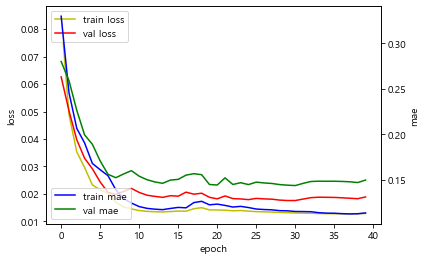

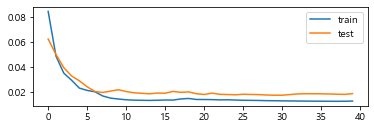

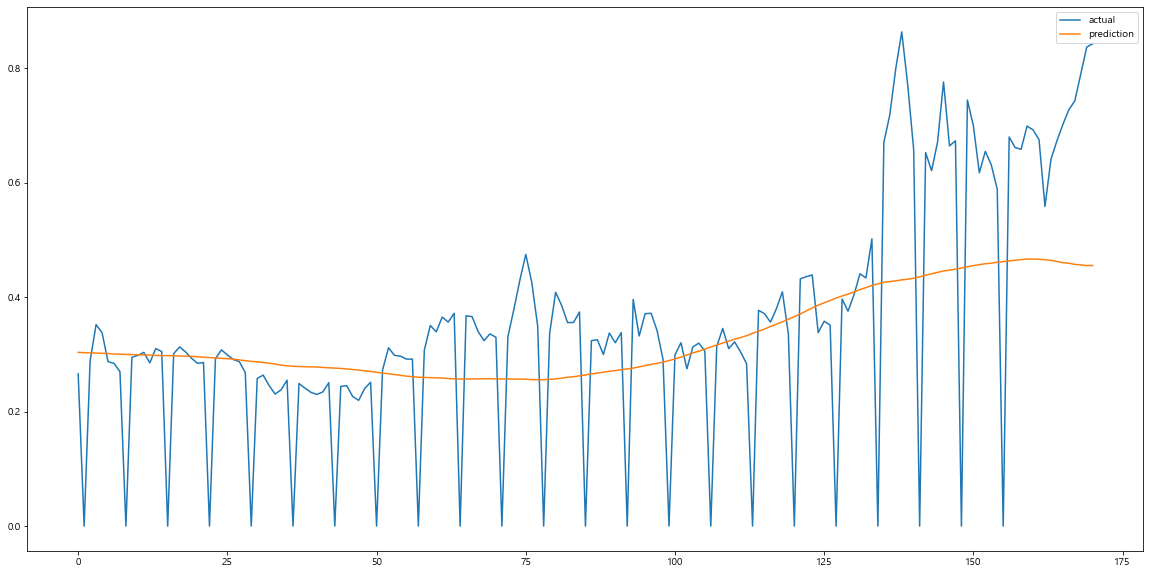

In [66]:
perfomance_plot_show(hist)
prediction_plot_show(test_y, pred)

In [56]:
reframed_df

배추_거래량(kg)  배추_가격(원/kg)_배추  rain_sum_1q_배추  heavy_rain_count_1q_배추  \
28      0.000000          0.0000        0.473884                     0.0   
29      0.015520          0.0658        0.442735                     0.0   
30      0.000000          0.0000        0.441785                     0.0   
31      0.273068          0.0956        0.441785                     0.0   
32      0.224029          0.0884        0.441785                     0.0   
...          ...             ...             ...                     ...   
1728    0.195776          0.3122        0.387464                     0.0   
1729    0.146494          0.3128        0.336182                     0.0   
1730    0.145963          0.2952        0.319088                     0.0   
1731    0.000000          0.0000        0.348528                     0.0   
1732    0.276601          0.2266        0.349478                     0.0   

      low_temp_count_1q_배추  middle_temp_count_1q_배추  high_temp_count_1q_배추  \
28                0.000000                 0.724138                    0.0   
29                0.033333                 0.724138                    0.0   
30                0.033333                 0.724138                    0.0   
31                0.033333                 0.724138                    0.0   
32                0.033333                 0.724138                    0.0   
...                    ...                      ...                    ...   
1728              0.000000                 0.000000                    0.0   
1729              0.000000                 0.000000                    0.0   
1730              0.000000                 0.000000                    0.0   
1731              0.000000                 0.000000                    0.0   
1732              0.000000                 0.000000                    0.0   

      avg_temp_1q_배추  avg_max_Temp_1q_배추  avg_min_Temp_1q_배추  ...  \
28          0.739884            0.712751            0.766525  ...   
29          0.713600            0.690955            0.735699  ...   
30          0.690152            0.670422            0.710487  ...   
31          0.667466            0.653891            0.686441  ...   
32          0.645763            0.634200            0.660805  ...   
...              ...                 ...                 ...  ...   
1728        0.920602            0.862799            0.964089  ...   
1729        0.922565            0.863431            0.966949  ...   
1730        0.923983            0.865431            0.967797  ...   
1731        0.923220            0.863746            0.967161  ...   
1732        0.922892            0.864694            0.965996  ...   

      당근_가격(원/kg)_당근_tg  파프리카_가격(원/kg)_파프리카_tg  새송이_가격(원/kg)_새송이_tg  \
28             0.233867               0.623095              0.80125   
29             0.232800               0.681369              0.79300   
30             0.266667               0.000000              0.79575   
31             0.237067               0.643081              0.86200   
32             0.232800               0.606402              0.84050   
...                 ...                    ...                  ...   
1728           0.417333               0.704954              0.73175   
1729           0.472800               0.695612              0.74850   
1730           0.374667               0.704342              0.73550   
1731           1.000000               0.000000              0.73650   
1732           0.533600               0.719274              0.84000   

      팽이버섯_가격(원/kg)_팽이버섯_tg  토마토_가격(원/kg)_토마토_tg  청상추_가격(원/kg)_청상추_tg  \
28                 0.462161             0.408138             0.259159   
29                 0.492534             0.403647             0.317432   
30                 0.000000             0.000000             0.299059   
31                 0.518097             0.420386             0.287050   
32                 0.528474             0.393576             0.246984   
...                     ...         

In [57]:
# 다중 입력 단일 출력 CNN + LSTM 모델

In [58]:
train_X.shape[2]

4579

In [96]:
# 하이퍼파라미터 전역변수
# device = torch.device("cuda:0")       # GPU 사용

# 입력/출력 품목/품종의 수
features_n = train_X.shape[2]           # 입력 품목/품종의 수
target_n = 21                           # 맞춰야하는 품목/품종의 수

BATCH_SIZE = 32                         # 배치사이즈
EPOCHS = 100                            # 총 eopochs
dropout = 0.2                           # 드롭아웃
# save_path = f'./best_model.h5'        # 모델 저장 경로
save_path = 'best_model.h5'             # 모델 저장 경로

# Optimizer 함수 최적화 함수 파라미터
# learning_rate
lr_list = [1e-5, 1e-4, 1e-3, 5e-4]      # 0.01 기준으로
# lr = lr_list[2]                       # 학습률 0.0005
lr = 1e-4                              # 학습률 0.0005

# Loss(cost) 함수 손실 함수 파라미터
# CNN + RNN 하이퍼 파라미터 
CONV_WIDTH = [3, 5]
filter_size = 32

In [97]:
seed_init(1031)

In [98]:
print(label_col_list)

['배추_가격(원/kg)_배추_tg', '무_가격(원/kg)_무_tg', '양파_가격(원/kg)_양파_tg', '건고추_가격(원/kg)_건고추_tg', '마늘_가격(원/kg)_마늘_tg', '대파_가격(원/kg)_대파_tg', '얼갈이배추_가격(원/kg)_얼갈이배추_tg', '양배추_가격(원/kg)_양배추_tg', '깻잎_가격(원/kg)_깻잎_tg', '시금치_가격(원/kg)_시금치_tg', '미나리_가격(원/kg)_미나리_tg', '당근_가격(원/kg)_당근_tg', '파프리카_가격(원/kg)_파프리카_tg', '새송이_가격(원/kg)_새송이_tg', '팽이버섯_가격(원/kg)_팽이버섯_tg', '토마토_가격(원/kg)_토마토_tg', '청상추_가격(원/kg)_청상추_tg', '백다다기_가격(원/kg)_백다다기_tg', '애호박_가격(원/kg)_애호박_tg', '캠벨얼리_가격(원/kg)_캠벨얼리_tg', '샤인마스캇_가격(원/kg)_샤인마스캇_tg']


(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 28, 32)            732672    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A74B043FA0>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	patience: [10]
Epoch 1/100

Ep

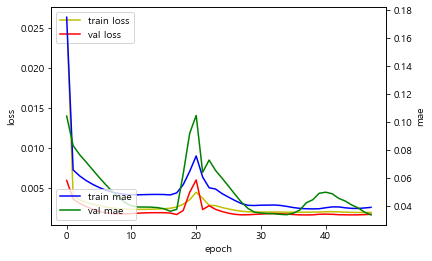

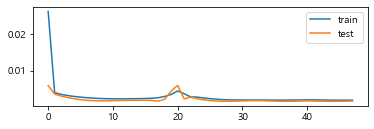

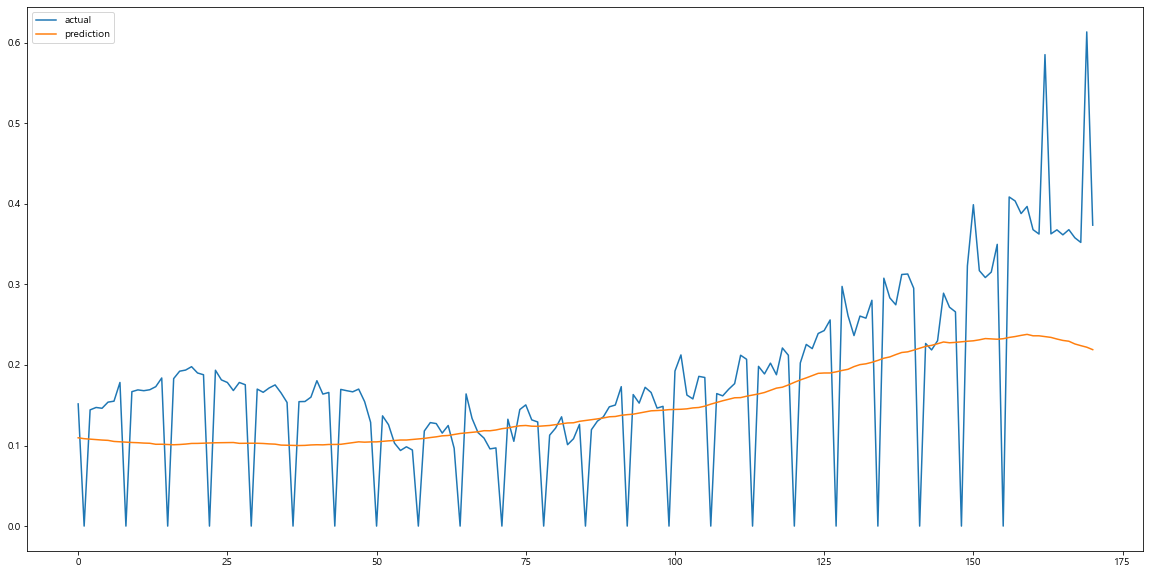

In [99]:
# 입력값과 출력값으로 분리
train_X, train_y = train_df.iloc[:, :features_len * WINDOW_SIZE], train_df.loc[:,label_col_list[0]]
val_X, val_y = val_df.iloc[:, :features_len * WINDOW_SIZE], val_df.loc[:,label_col_list[0]]
test_X, test_y = test_df.iloc[:, :features_len * WINDOW_SIZE], test_df.loc[:,label_col_list[0]]
# train_X, train_y = train_df.iloc[:, :features_len * WINDOW_SIZE], train_df.loc[:,col]
# val_X, val_y = val_df.iloc[:, :features_len * WINDOW_SIZE], val_df.loc[:,col]
# test_X, test_y = test_df.iloc[:, :features_len * WINDOW_SIZE], test_df.loc[:,col]
#=============================================================================================== label_col_list 변경해야함.
# 범위, 타임스탬프, 컬럼
train_X = train_X.values.reshape((train_X.shape[0], WINDOW_SIZE, features_len))
val_X = val_X.values.reshape((val_X.shape[0], WINDOW_SIZE, features_len))
test_X = test_X.values.reshape((test_X.shape[0], WINDOW_SIZE, features_len))

train_y = train_y.values.reshape((train_y.shape[0], 1))
val_y = val_y.values.reshape((val_y.shape[0], 1))
test_y = test_y.values.reshape((test_y.shape[0], 1))
# print(so_train_X.shape, train_y.shape, test_X.shape, test_y.shape)

print(train_X.shape, train_y.shape)
print(val_X.shape, val_y.shape)
print(test_X.shape, test_y.shape)

# 모델 구성 CNN + LSTM
conv_lstm2_model = keras.Sequential([
    keras.layers.Conv1D(filters=filter_size, kernel_size=(CONV_WIDTH[1], ),
                        strides=1, padding="causal", 
                        activation="relu", 
                        input_shape=[WINDOW_SIZE, features_n]), 
    # keras.layers.LSTM(21, activation="relu", return_sequences=True),
    keras.layers.LSTM(32, activation="relu", return_sequences=False),
    # keras.layers.Dense(21, activation="relu"),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(1),
    # keras.layers.Lambda(lambda x: x * 200)
])
conv_lstm2_model.summary()
hist = model_complie_fit(conv_lstm2_model, train_X, train_y, val_X, val_y)
# 저장한 데이터를 로드
conv_lstm2_model.load_weights("best_model.h5")
# conv_lstm_model = keras.models.load_weights("best_model.h5")
pred = conv_lstm2_model.predict(test_X)
val_performance_dict, performance_dict = model_perfomance_print(conv_lstm2_model, "CNN_LSTM2", val_X, val_y, test_X, test_y, False)
score = r2_score(test_y, pred)
# test_y.shape
print("r2 score :", r2_score(test_y, pred))

perfomance_plot_show(hist)
# prediction_plot_show(test_y, pred)
# prediction_plot_show(test_y, pred)
# test_y_df = pd.DataFrame(test_y.reshape(test_y.shape[0]*test_y.shape[1], test_y.shape[2]))
# pred_df=pd.DataFrame(arg_pred)

# 예측 데이터 시각화 
plt.figure(figsize=(20, 10))
plt.plot(test_y, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
################################################################ 통합 데이터 품목별 출력 !!!!!!!!!!!!!!!!!!!!!!!

배추_가격(원/kg)_배추_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 28, 32)            732672    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A75B6D2F40>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	pat

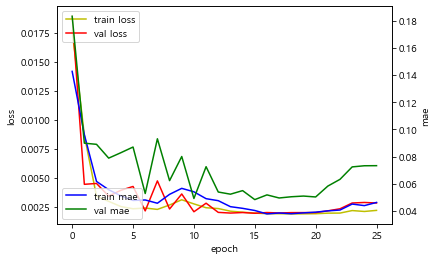

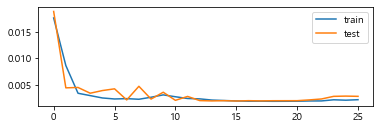

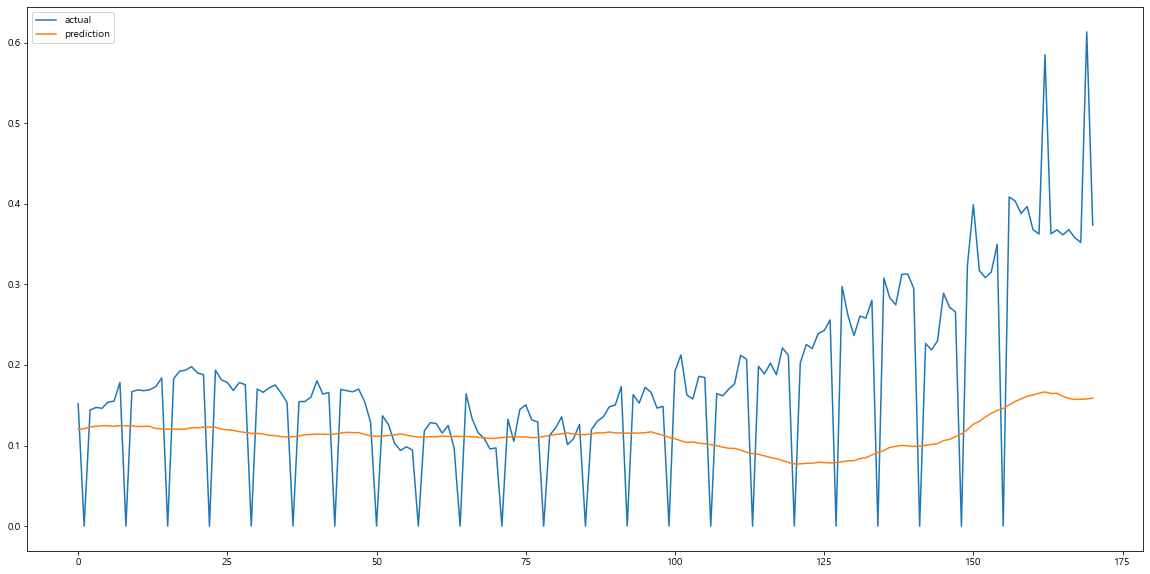

무_가격(원/kg)_무_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 28, 32)            732672    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A74D66FE20>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	patie

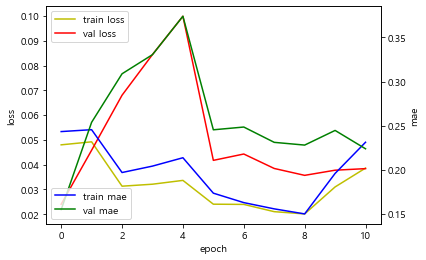

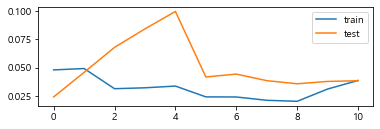

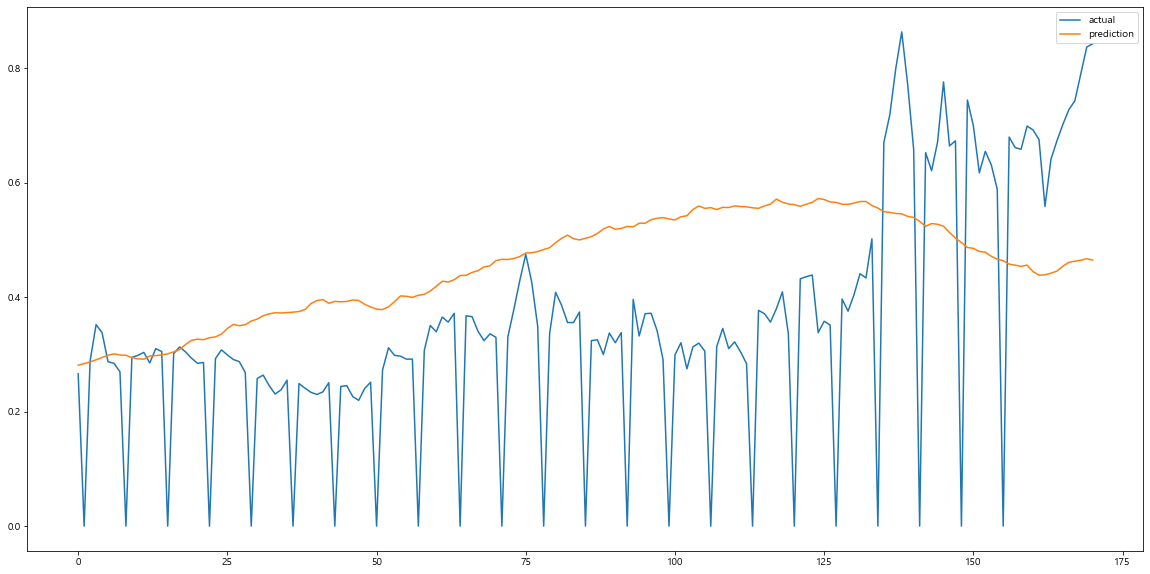

양파_가격(원/kg)_양파_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 28, 32)            732672    
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A741677D00>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	pat

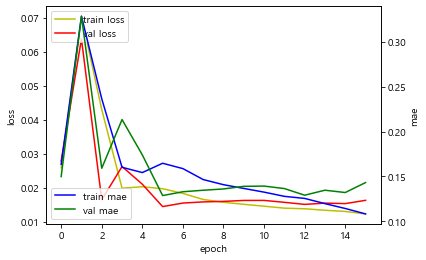

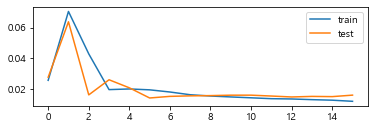

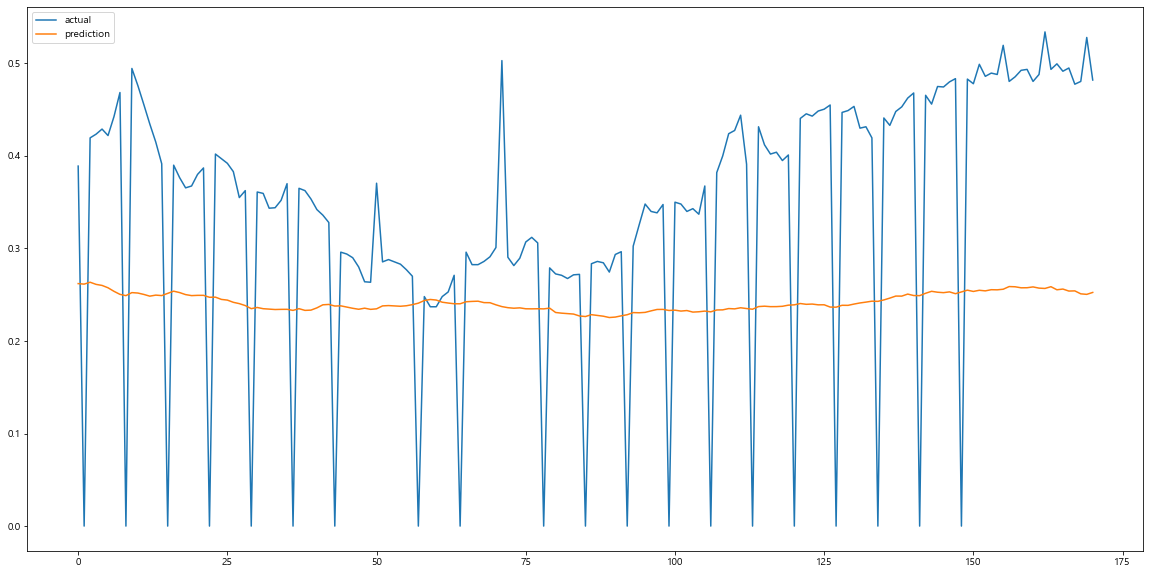

건고추_가격(원/kg)_건고추_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 28, 32)            732672    
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A75BABE3D0>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	p

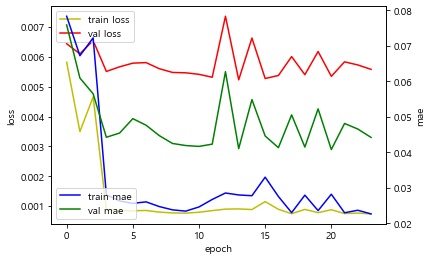

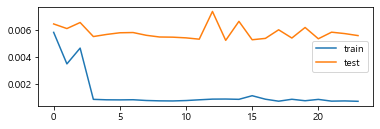

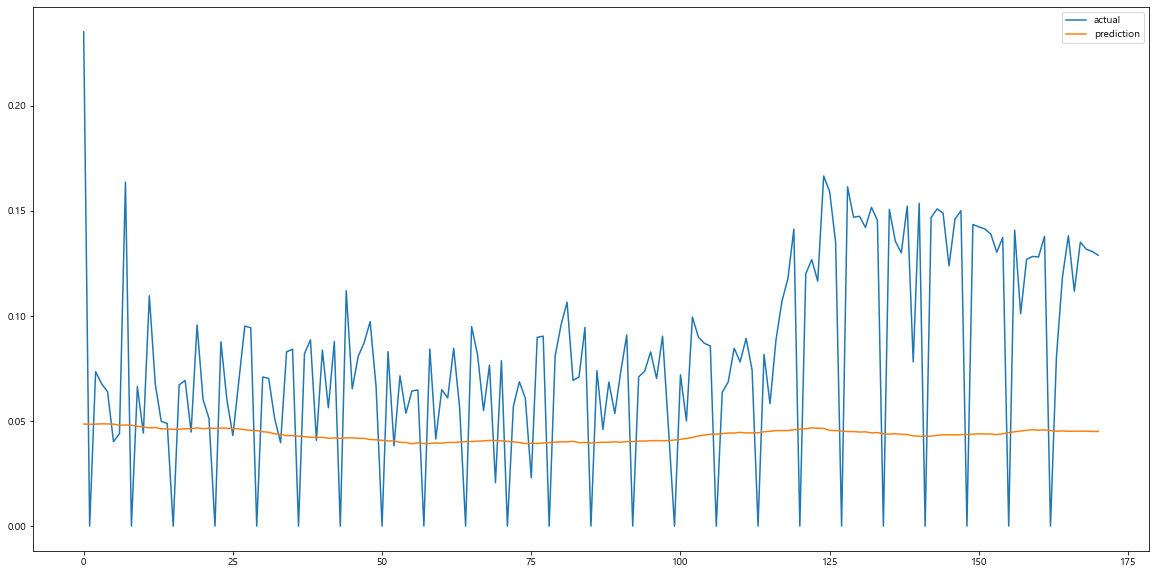

마늘_가격(원/kg)_마늘_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 28, 32)            732672    
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A74197CF10>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	pat

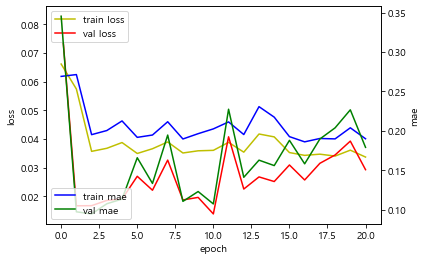

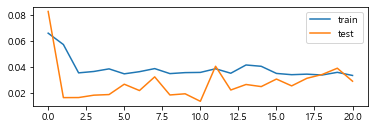

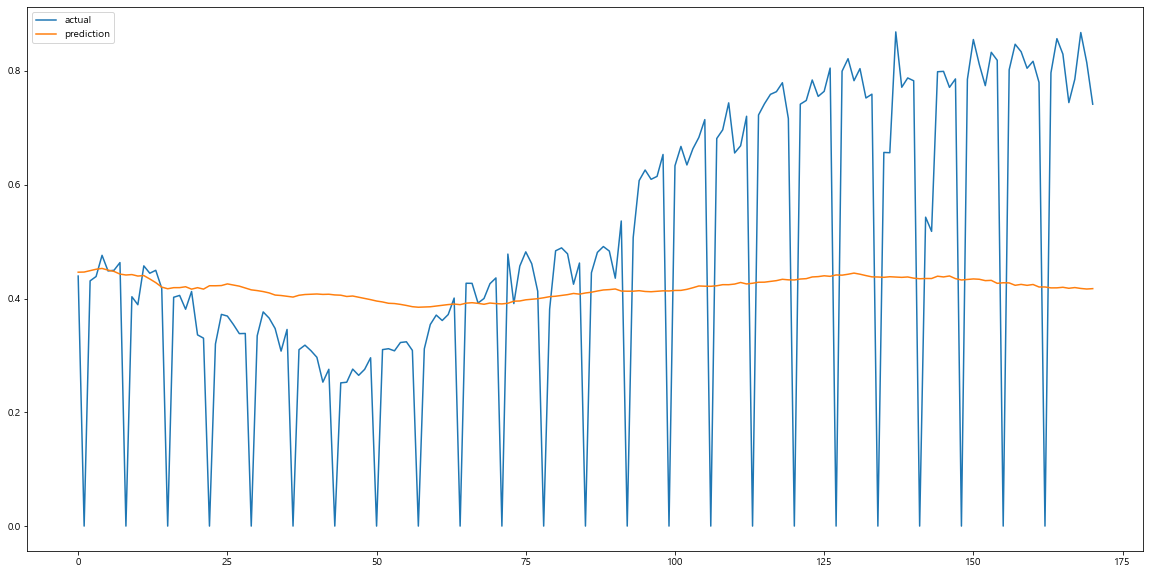

대파_가격(원/kg)_대파_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 28, 32)            732672    
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A7415B3FA0>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	pat

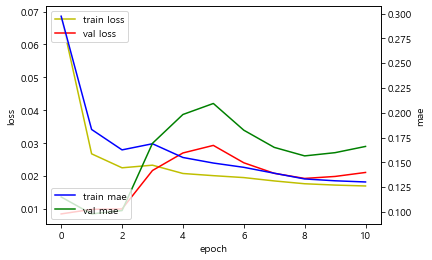

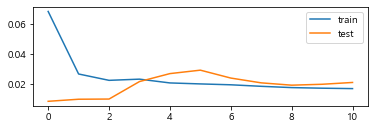

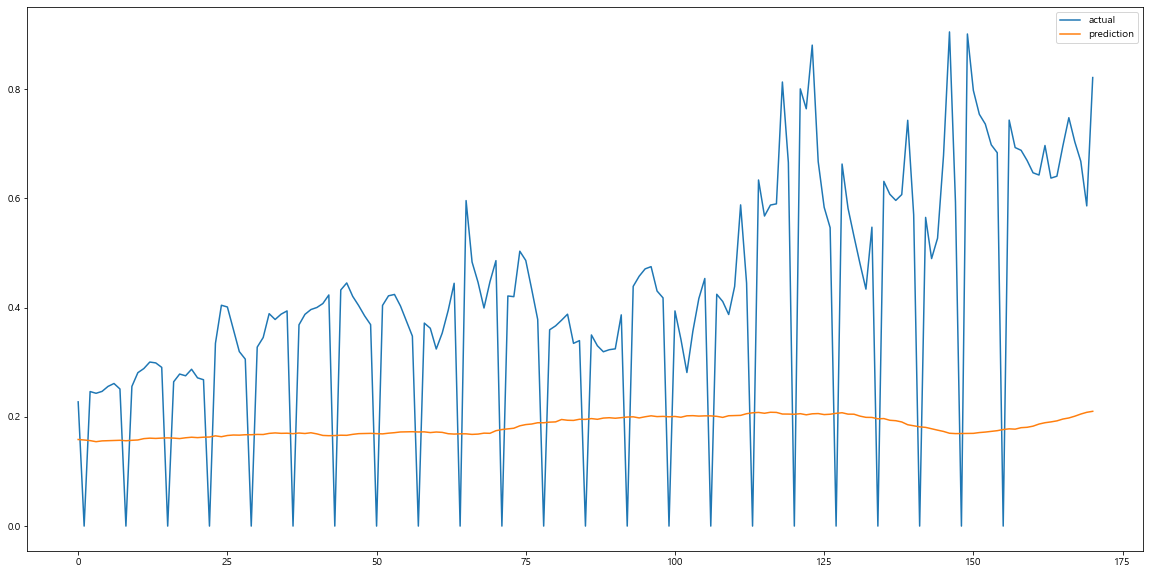

얼갈이배추_가격(원/kg)_얼갈이배추_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 28, 32)            732672    
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A741AF2910>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss

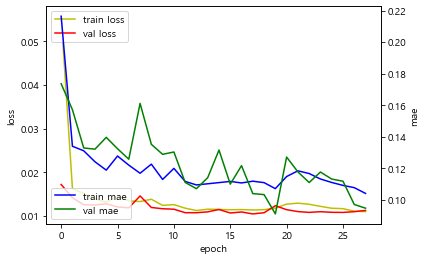

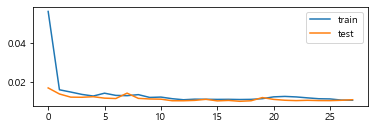

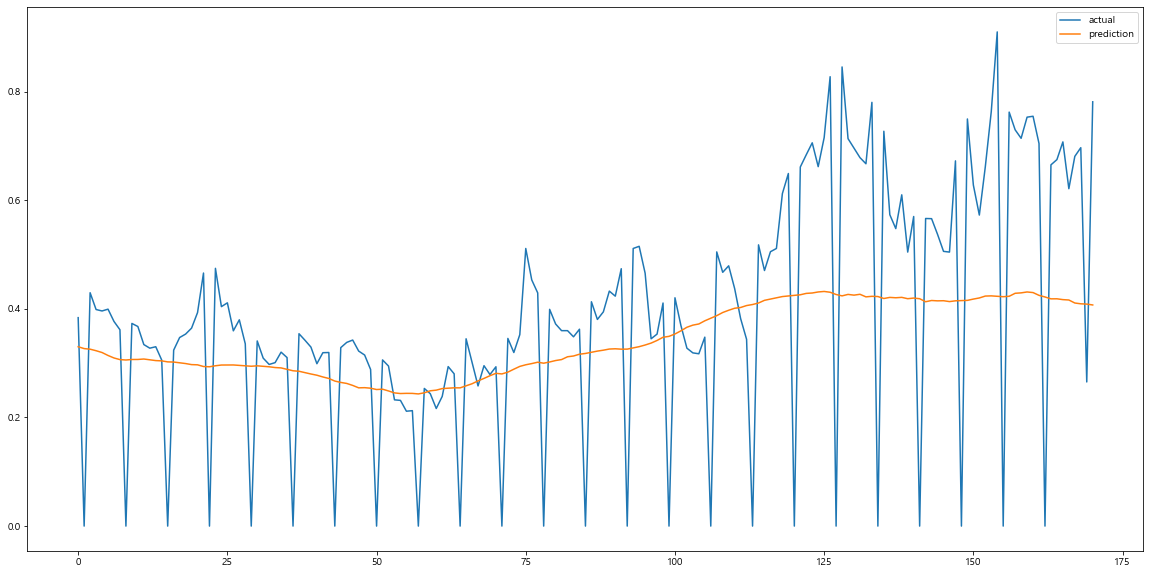

양배추_가격(원/kg)_양배추_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 28, 32)            732672    
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A756B806A0>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	p

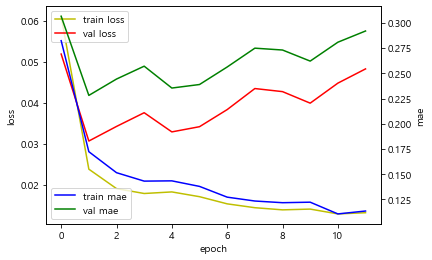

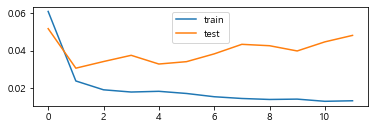

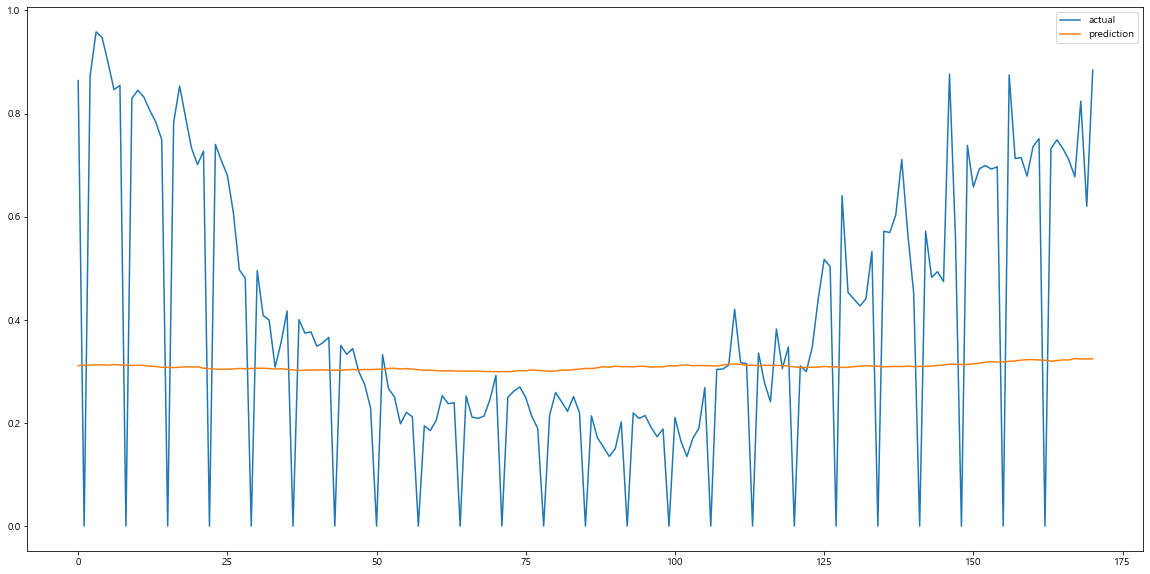

깻잎_가격(원/kg)_깻잎_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 28, 32)            732672    
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A75B9947C0>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	pat

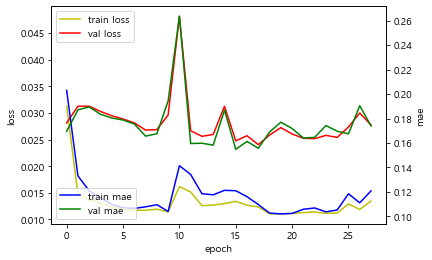

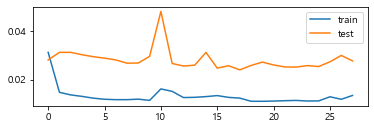

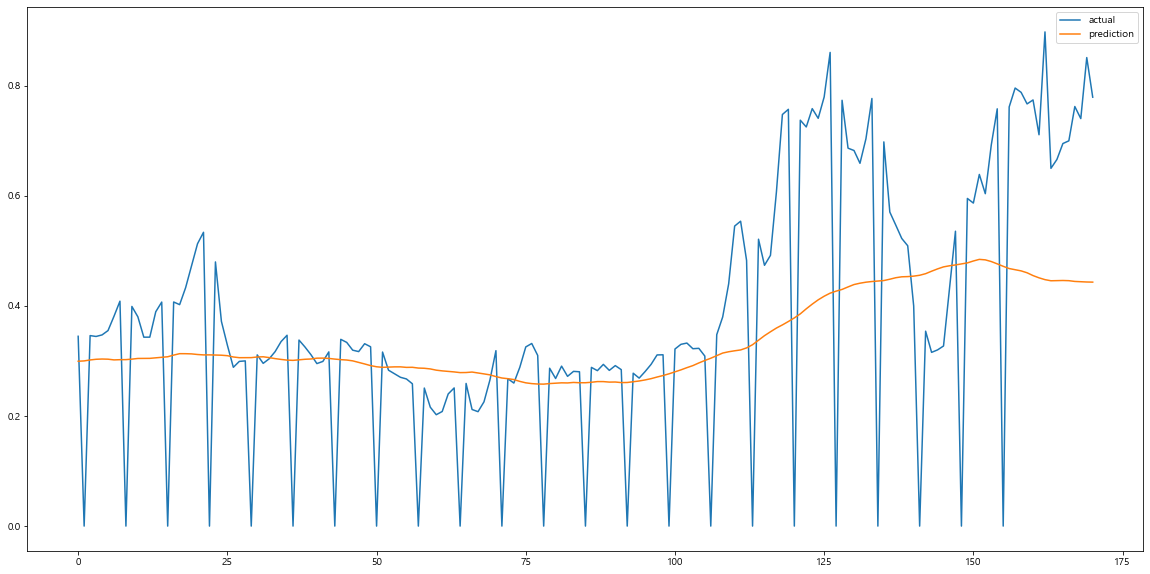

시금치_가격(원/kg)_시금치_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 28, 32)            732672    
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A74169C640>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	

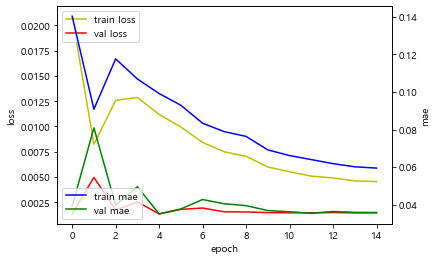

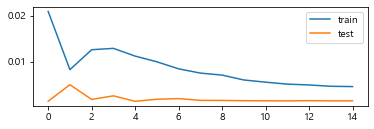

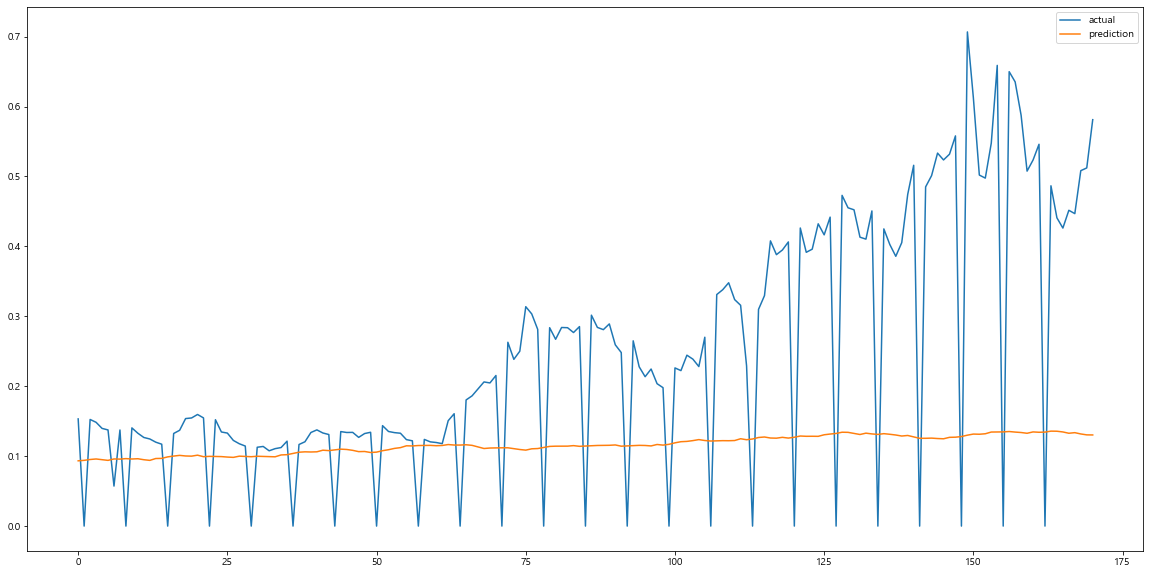

미나리_가격(원/kg)_미나리_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 28, 32)            732672    
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A756EB45B0>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	

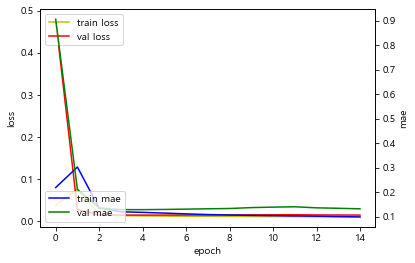

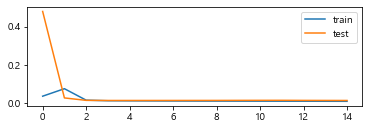

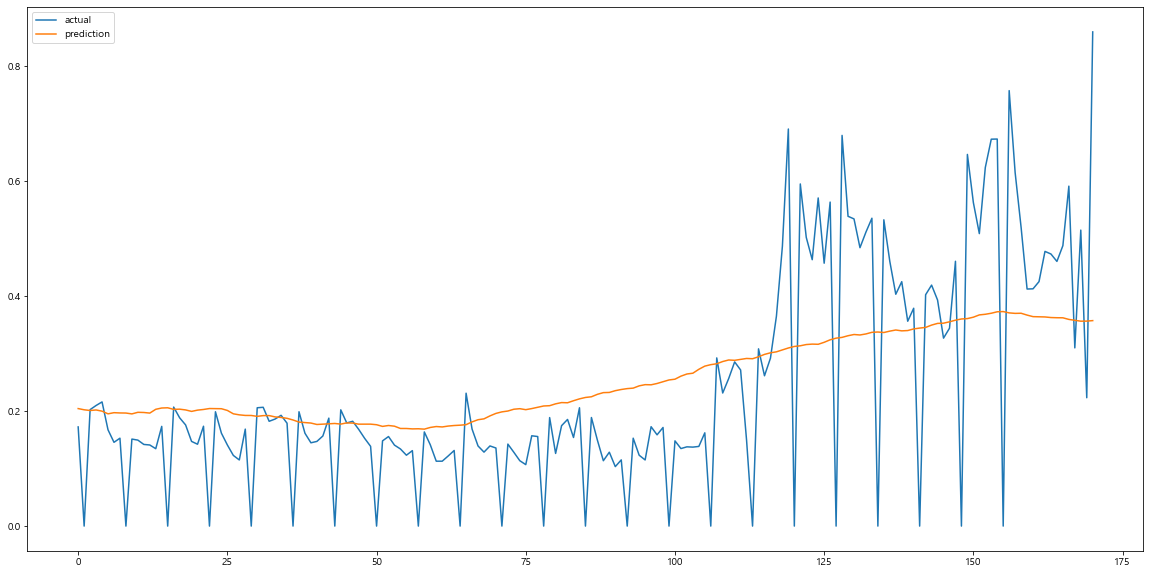

당근_가격(원/kg)_당근_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 28, 32)            732672    
_________________________________________________________________
lstm_12 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A757081580>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	pa

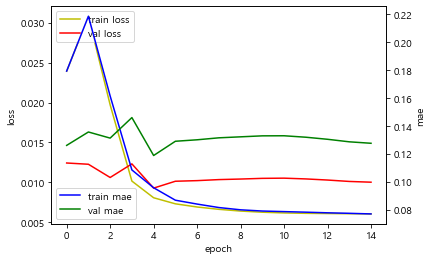

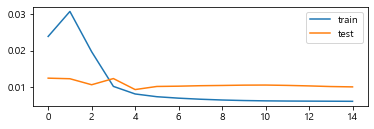

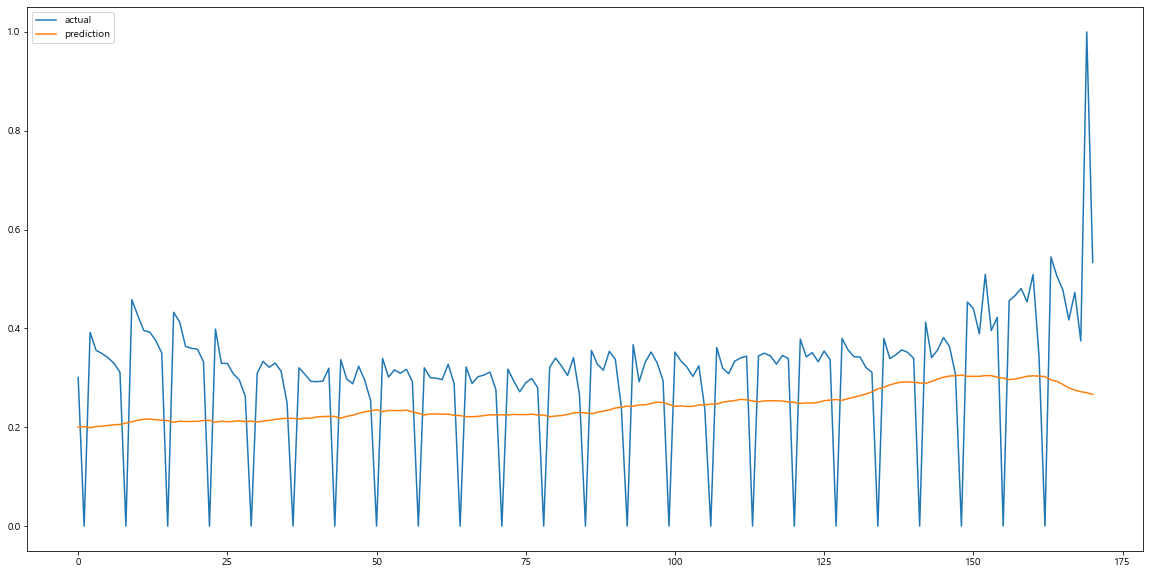

파프리카_가격(원/kg)_파프리카_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 28, 32)            732672    
_________________________________________________________________
lstm_13 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A7415D3D00>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss]

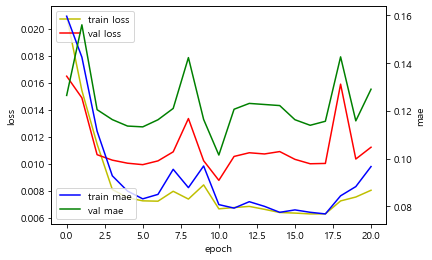

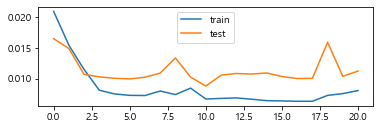

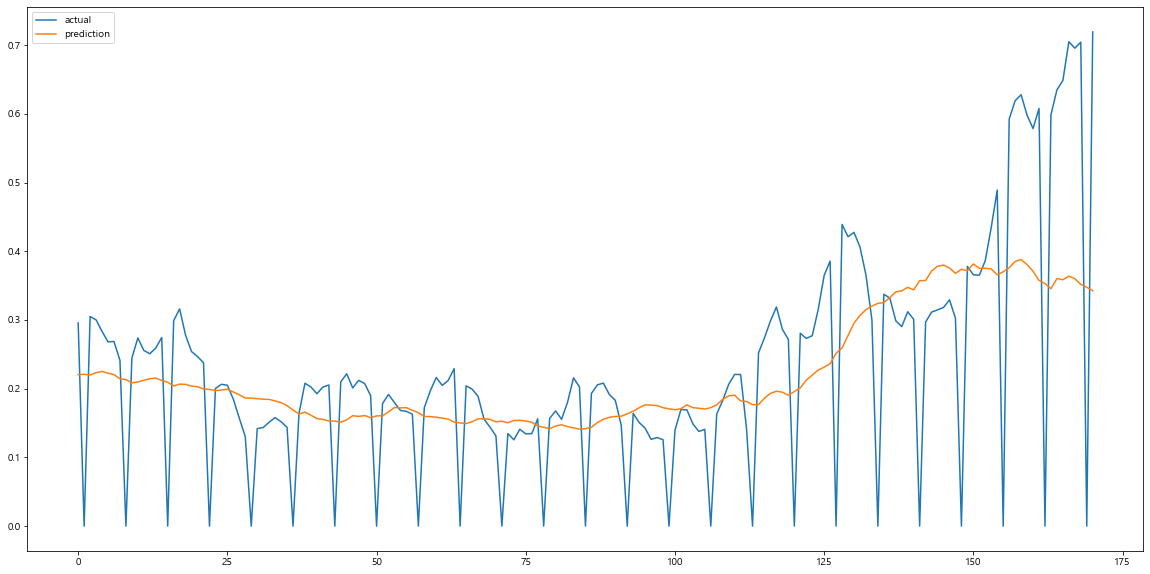

새송이_가격(원/kg)_새송이_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 28, 32)            732672    
_________________________________________________________________
lstm_14 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A7403DC3D0>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	

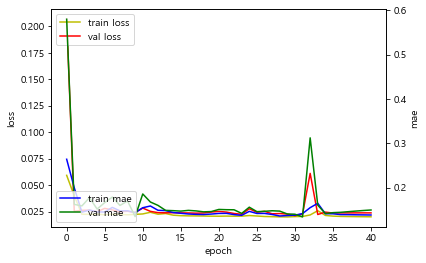

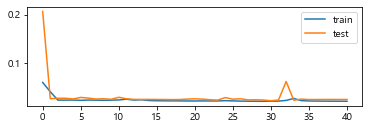

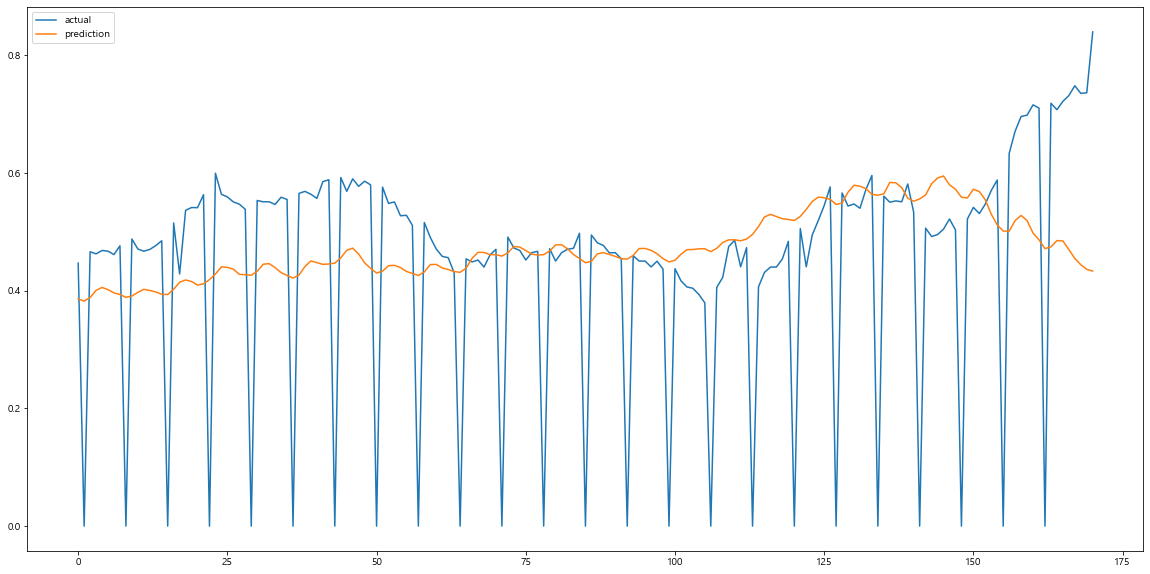

팽이버섯_가격(원/kg)_팽이버섯_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 28, 32)            732672    
_________________________________________________________________
lstm_15 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A75B5DB9A0>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss]

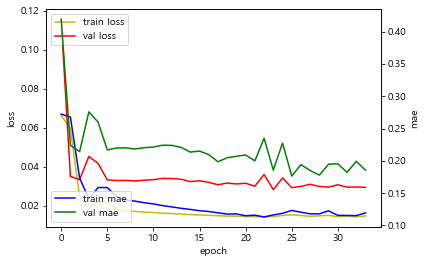

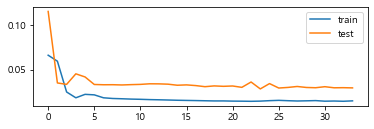

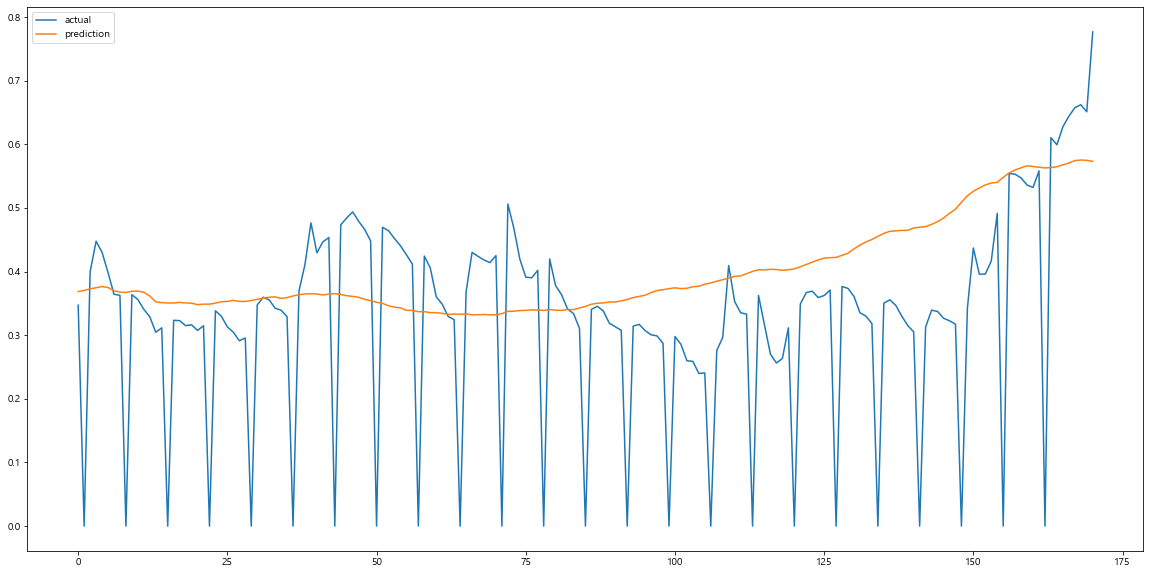

토마토_가격(원/kg)_토마토_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 28, 32)            732672    
_________________________________________________________________
lstm_16 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A74C890E80>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	

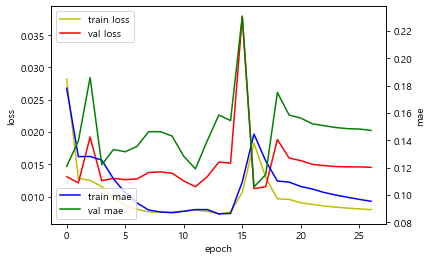

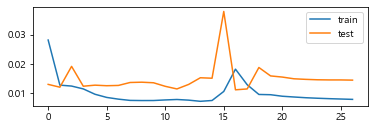

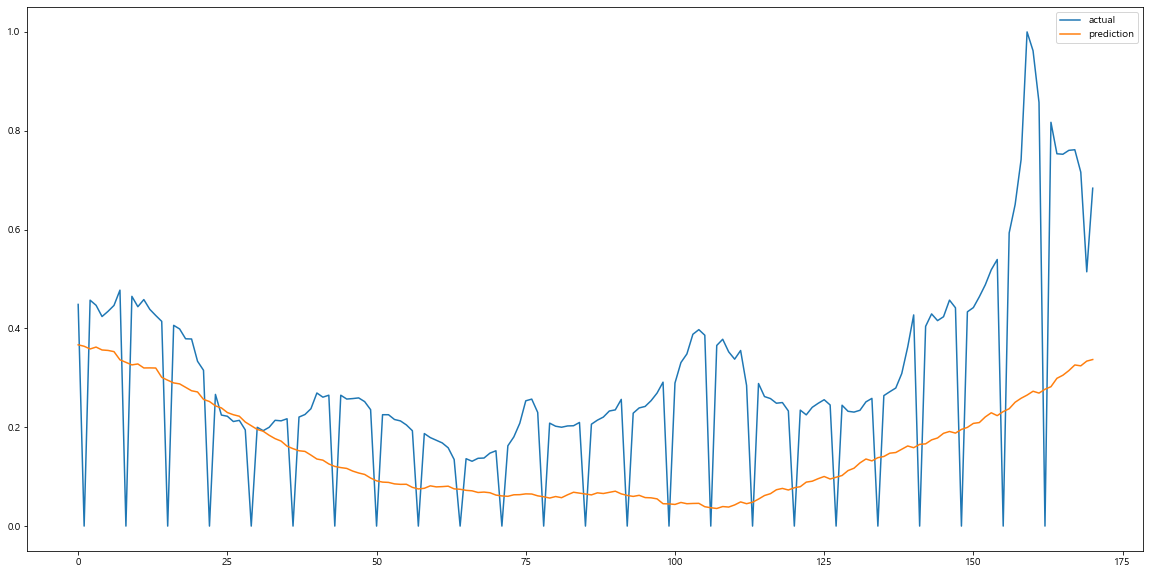

청상추_가격(원/kg)_청상추_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 28, 32)            732672    
_________________________________________________________________
lstm_17 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A7567734C0>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	

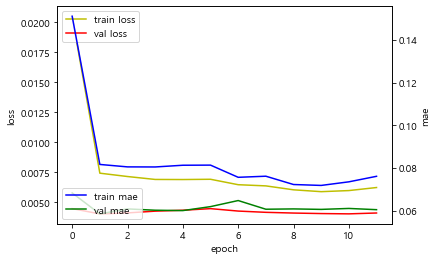

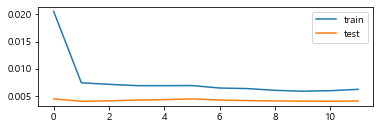

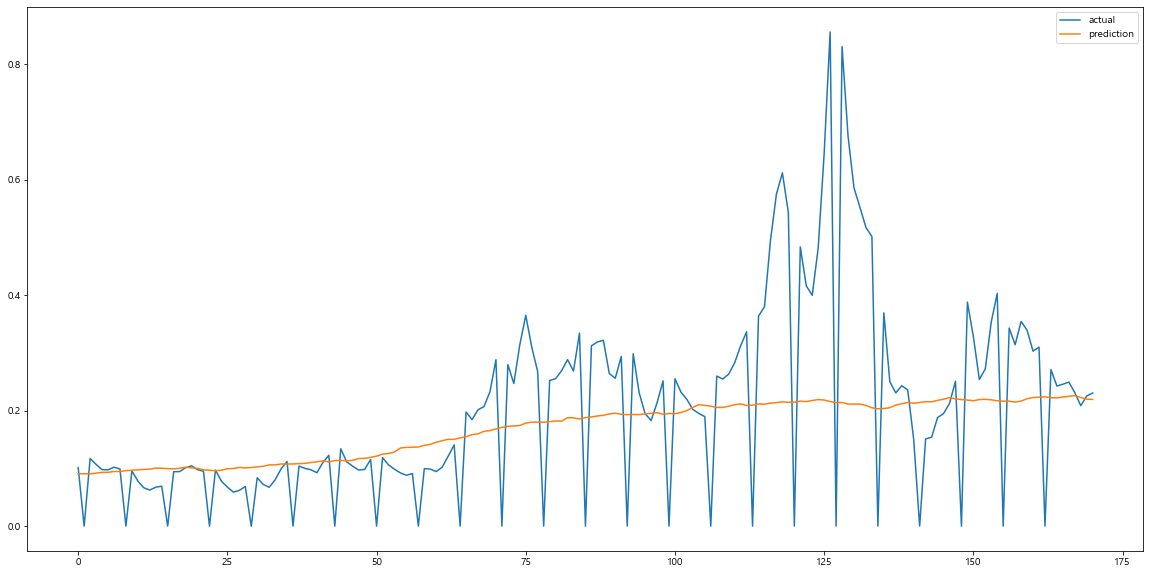

백다다기_가격(원/kg)_백다다기_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 28, 32)            732672    
_________________________________________________________________
lstm_18 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A74C5704C0>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss]

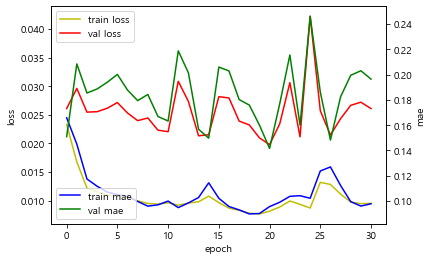

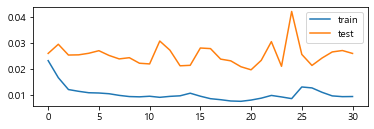

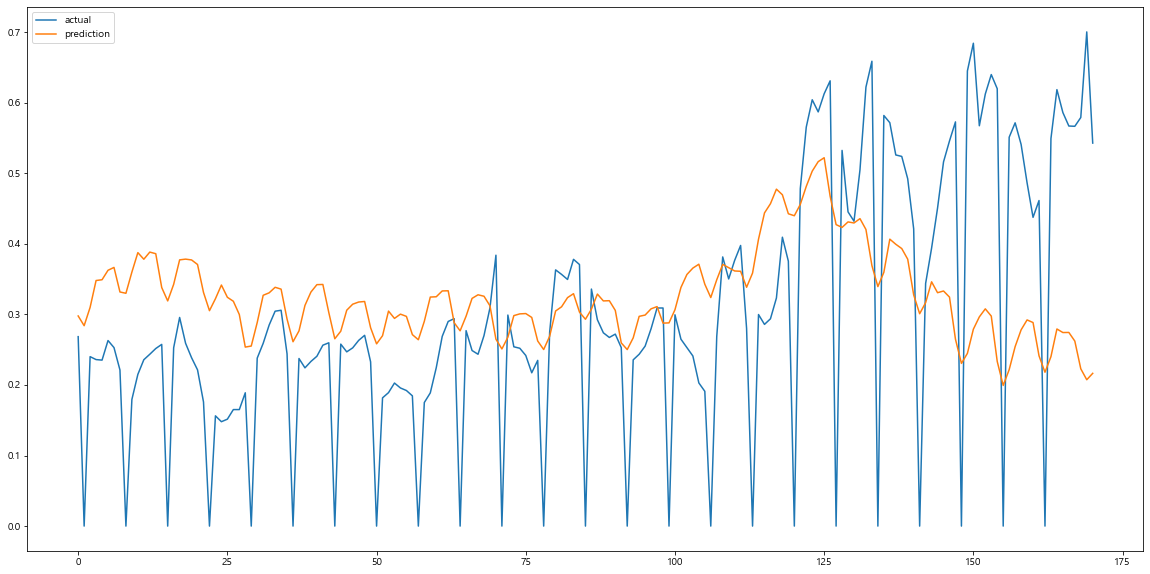

애호박_가격(원/kg)_애호박_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_19 (Conv1D)           (None, 28, 32)            732672    
_________________________________________________________________
lstm_19 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A74D2107C0>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	

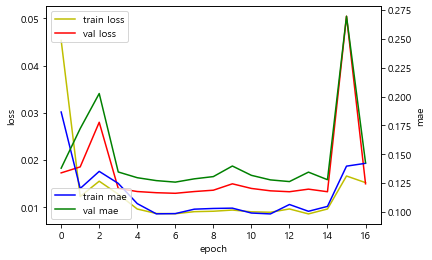

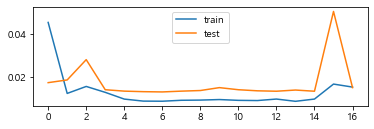

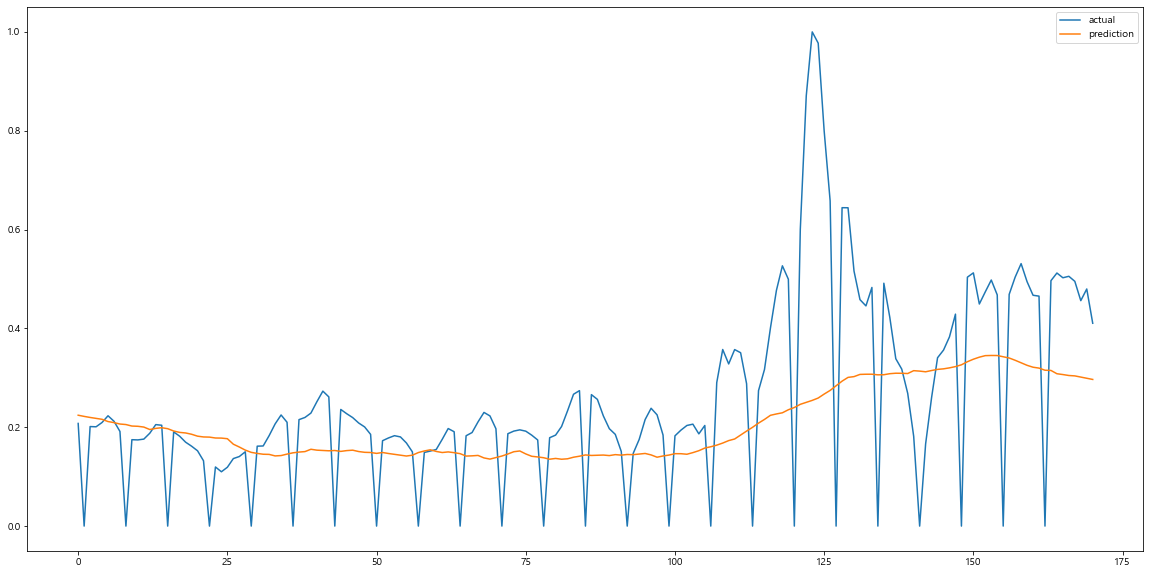

캠벨얼리_가격(원/kg)_캠벨얼리_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 28, 32)            732672    
_________________________________________________________________
lstm_20 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A75673CDC0>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss]

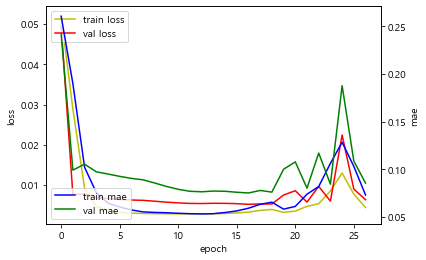

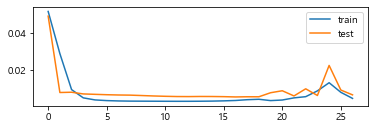

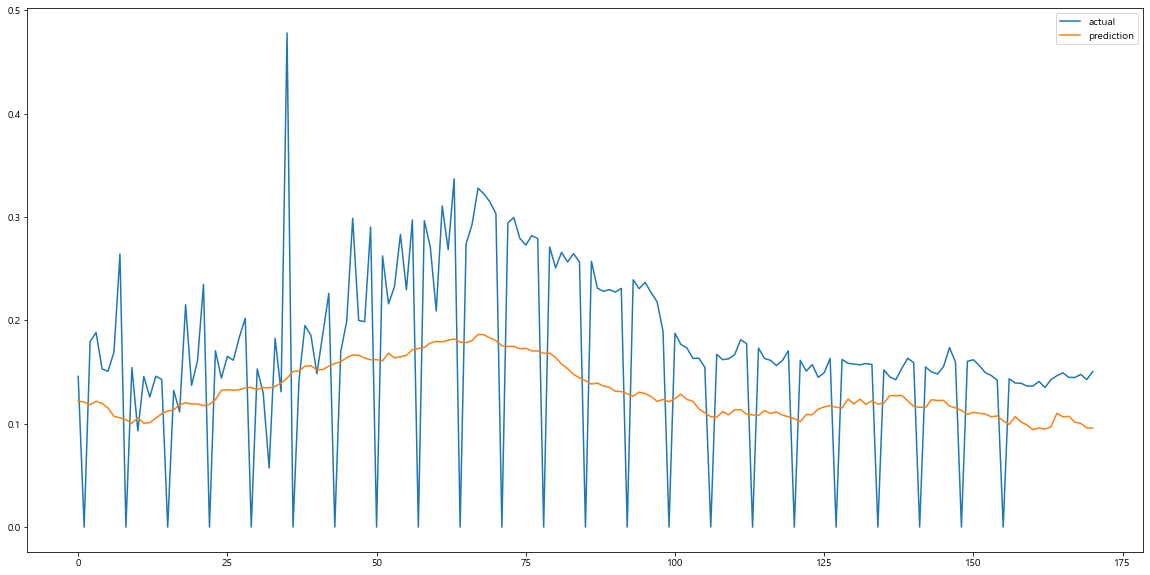

샤인마스캇_가격(원/kg)_샤인마스캇_tg 예측 모델 
(1364, 28, 4579) (1364, 1)
(170, 28, 4579) (170, 1)
(171, 28, 4579) (171, 1)
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_21 (Conv1D)           (None, 28, 32)            732672    
_________________________________________________________________
lstm_21 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 33        
Total params: 741,025
Trainable params: 741,025
Non-trainable params: 0
_________________________________________________________________
optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001A7415ADB50>]
loss_function: [<function huber at 0x000001A739A020D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_los

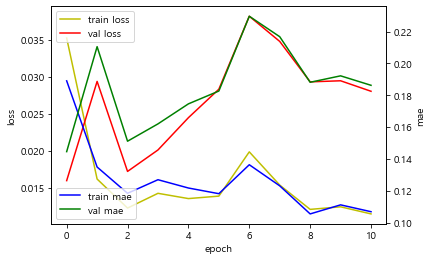

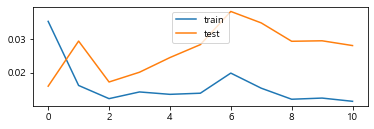

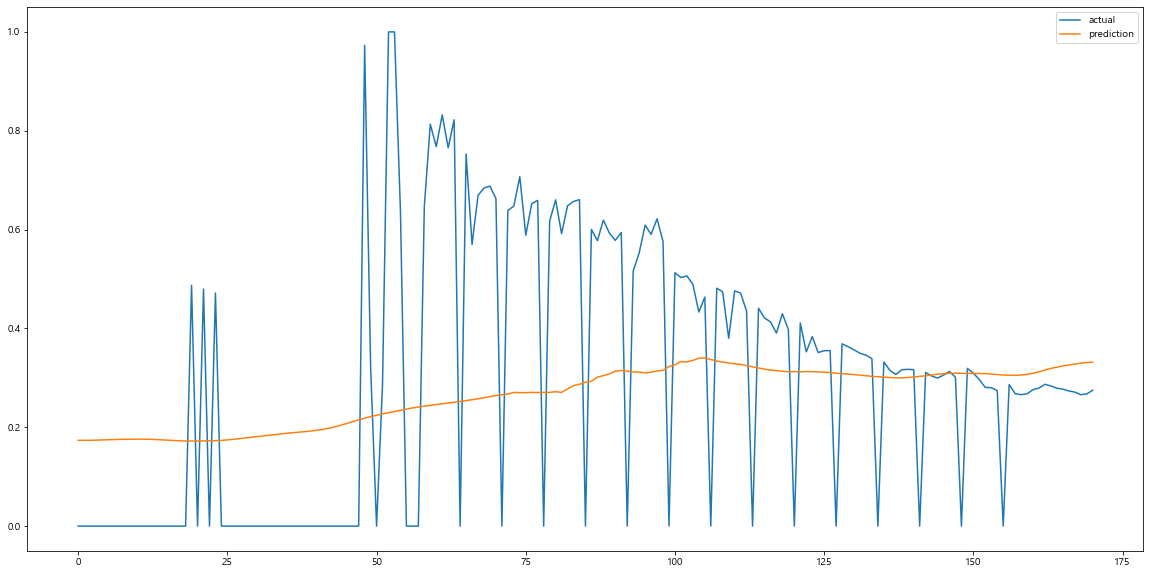

In [100]:
for col in label_col_list:
    print("="*100)
    print("{0} 예측 모델 ".format(col))
    print("="*100)
    # 입력값과 출력값으로 분리
    # train_X, train_y = train_df.iloc[:, :features_len * WINDOW_SIZE], train_df.loc[:,label_col_list[0]]
    # val_X, val_y = val_df.iloc[:, :features_len * WINDOW_SIZE], val_df.loc[:,label_col_list[0]]
    # test_X, test_y = test_df.iloc[:, :features_len * WINDOW_SIZE], test_df.loc[:,label_col_list[0]]
    train_X, train_y = train_df.iloc[:, :features_len * WINDOW_SIZE], train_df.loc[:,col]
    val_X, val_y = val_df.iloc[:, :features_len * WINDOW_SIZE], val_df.loc[:,col]
    test_X, test_y = test_df.iloc[:, :features_len * WINDOW_SIZE], test_df.loc[:,col]
    #=============================================================================================== label_col_list 변경해야함.
    # 범위, 타임스탬프, 컬럼
    train_X = train_X.values.reshape((train_X.shape[0], WINDOW_SIZE, features_len))
    val_X = val_X.values.reshape((val_X.shape[0], WINDOW_SIZE, features_len))
    test_X = test_X.values.reshape((test_X.shape[0], WINDOW_SIZE, features_len))

    train_y = train_y.values.reshape((train_y.shape[0], 1))
    val_y = val_y.values.reshape((val_y.shape[0], 1))
    test_y = test_y.values.reshape((test_y.shape[0], 1))
    # print(so_train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    print(train_X.shape, train_y.shape)
    print(val_X.shape, val_y.shape)
    print(test_X.shape, test_y.shape)

    # 모델 구성 CNN + LSTM
    conv_lstm2_model = keras.Sequential([
        keras.layers.Conv1D(filters=filter_size, kernel_size=(CONV_WIDTH[1], ),
                            strides=1, padding="causal", 
                            activation="relu", 
                            input_shape=[WINDOW_SIZE, features_n]), 
        # keras.layers.LSTM(32, activation="relu", return_sequences=True),
        keras.layers.LSTM(32, activation="relu", return_sequences=False),
        # keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(1),
        # keras.layers.Lambda(lambda x: x * 200)
    ])
    conv_lstm2_model.summary()
    hist = model_complie_fit(conv_lstm2_model, train_X, train_y, val_X, val_y)
    # 저장한 데이터를 로드
    conv_lstm2_model.load_weights("best_model.h5")
    # conv_lstm_model = keras.models.load_weights("best_model.h5")
    pred = conv_lstm2_model.predict(test_X)
    val_performance_dict, performance_dict = model_perfomance_print(conv_lstm2_model, "CNN_LSTM2", val_X, val_y, test_X, test_y, False)
    score = r2_score(test_y, pred)
    # test_y.shape
    print("r2 score :", r2_score(test_y, pred))

    perfomance_plot_show(hist)
    # prediction_plot_show(test_y, pred)
    # prediction_plot_show(test_y, pred)
    # test_y_df = pd.DataFrame(test_y.reshape(test_y.shape[0]*test_y.shape[1], test_y.shape[2]))
    # pred_df=pd.DataFrame(arg_pred)

    # 예측 데이터 시각화 
    plt.figure(figsize=(20, 10))
    plt.plot(test_y, label='actual')
    plt.plot(pred, label='prediction')
    plt.legend()
    plt.show()

In [ ]:
# CNN + LSTM, LSTM 

# 특성공학 CNN + LSTM, LSTM

# 튜닝 

# seq2seq, light GBM

# 특성공학 
# 7, 14, 28

In [ ]:
# 하이퍼파라미터 전역변수
# device = torch.device("cuda:0")       # GPU 사용

# 입력/출력 품목/품종의 수
features_n = 43                         # 입력 품목/품종의 수
target_n = 21                           # 맞춰야하는 품목/품종의 수

BATCH_SIZE = 32                         # 배치사이즈
EPOCHS = 100                            # 총 eopochs
dropout = 0.2                           # 드롭아웃
# save_path = f'./best_model.h5'        # 모델 저장 경로
save_path = 'best_model.h5'             # 모델 저장 경로

# Optimizer 함수 최적화 함수 파라미터
# learning_rate
lr_list = [1e-5, 1e-4, 1e-3, 5e-4]      # 0.01 기준으로
# lr = lr_list[1]                       # 학습률 0.0005
lr = 11e-4                              # 학습률 0.0001 

# Loss(cost) 함수 손실 함수 파라미터
# CNN + RNN 하이퍼 파라미터 
CONV_WIDTH = [3, 5]
filter_size = 32

In [ ]:
# 양배추, 시금치, 미나리, 파프리카, 새송이, 당근
# print(label_col_list)
# label_col_list = ['양배추_가격(원/kg)_tg', '시금치_가격(원/kg)_tg', '미나리_가격(원/kg)_tg'
#                   , '파프리카_가격(원/kg)_tg', '새송이_가격(원/kg)_tg', '당근_가격(원/kg)_tg']

# for col in label_col_list:
#     if "양배추" in col:

배추_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
Tra

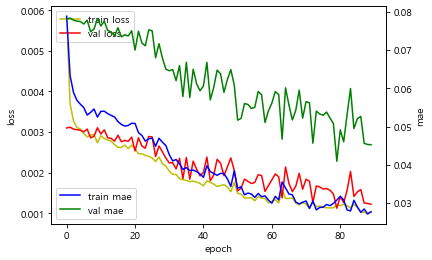

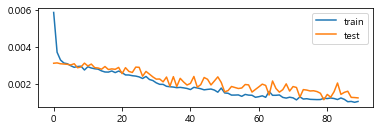

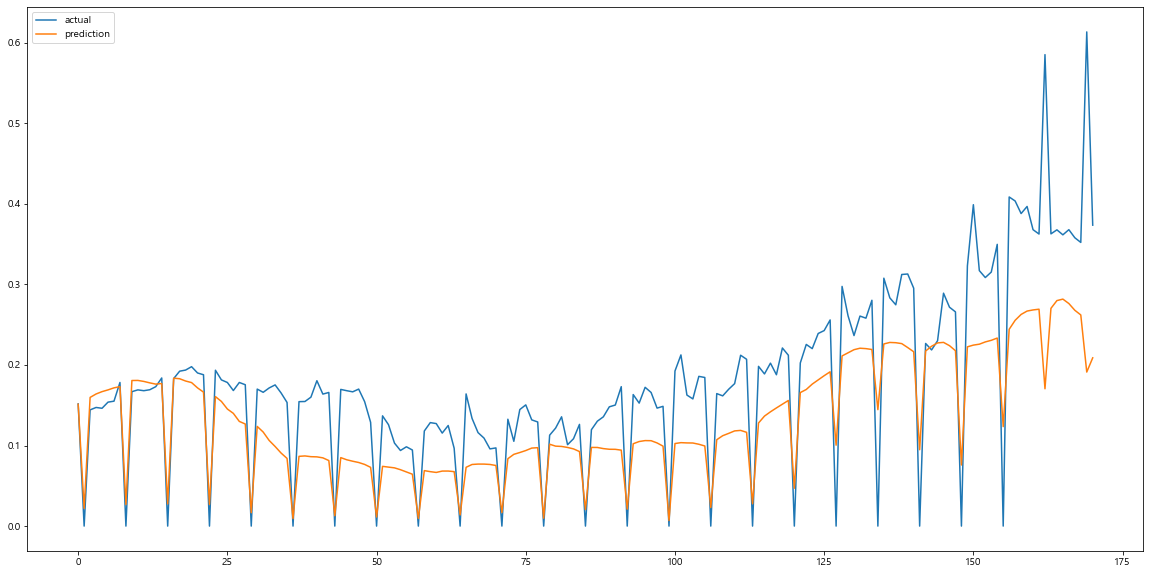

무_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
Trai

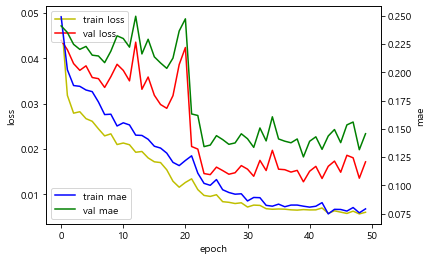

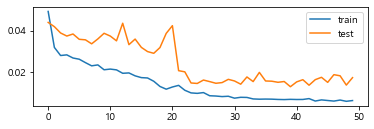

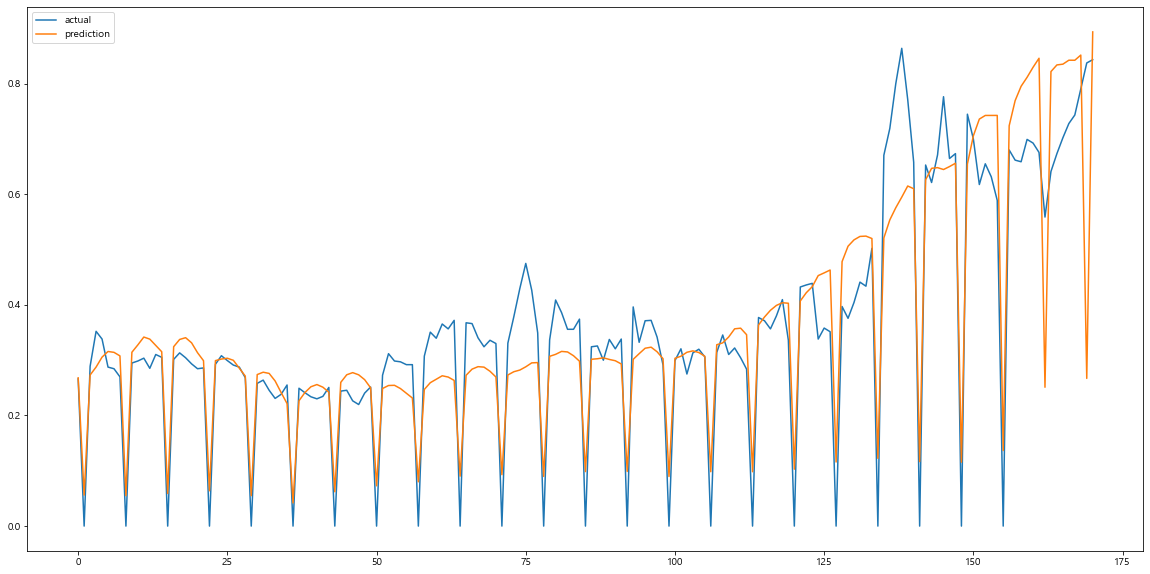

양파_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
Tra

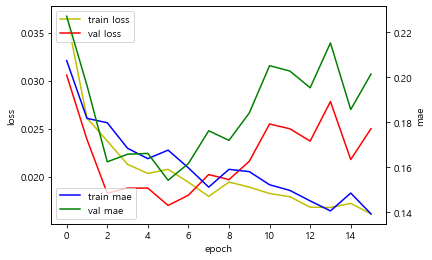

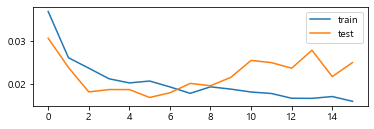

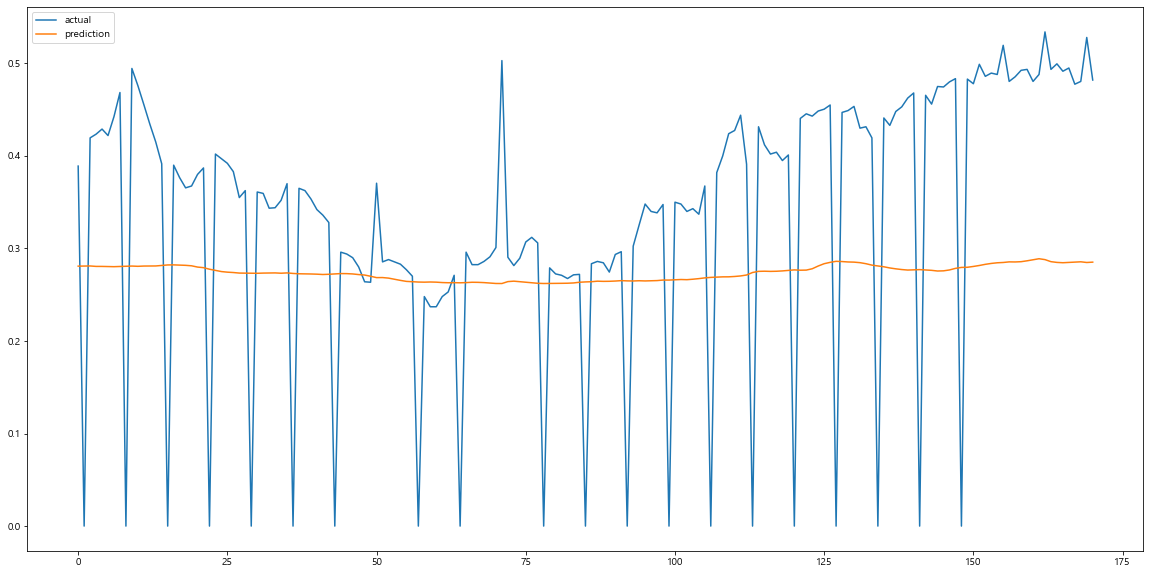

건고추_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
Tr

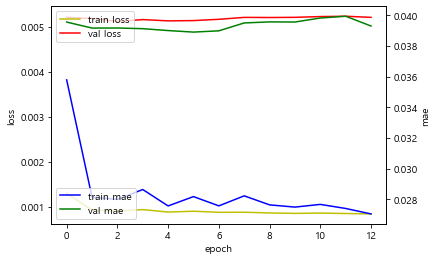

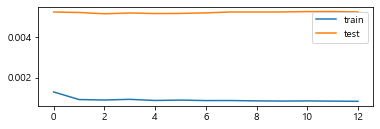

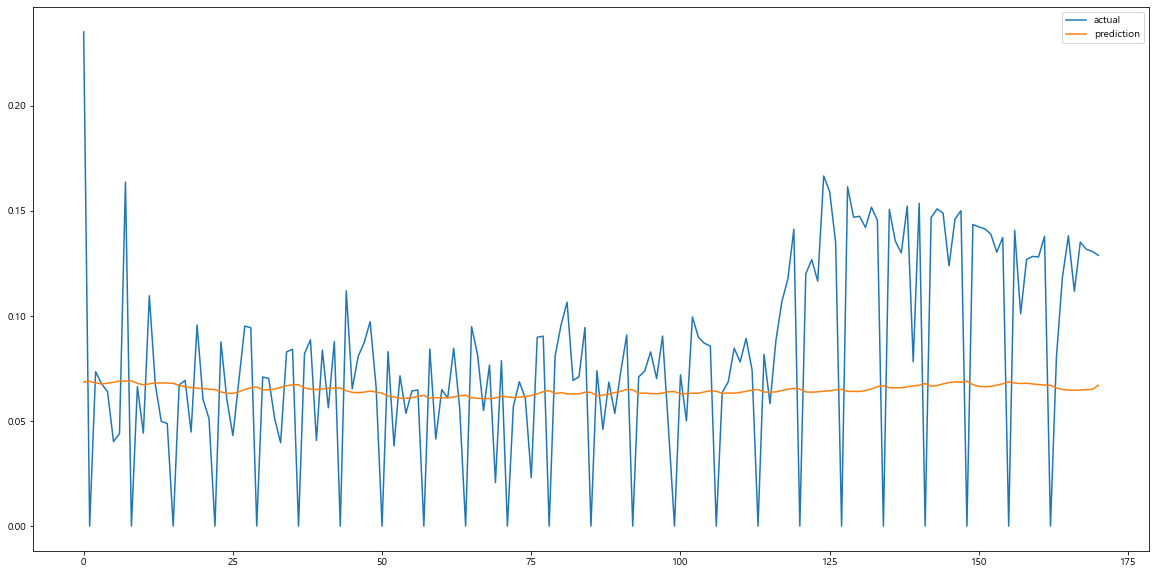

마늘_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
Tra

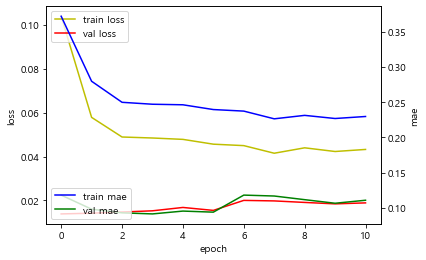

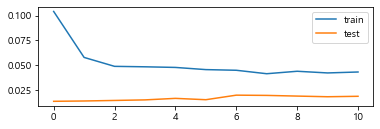

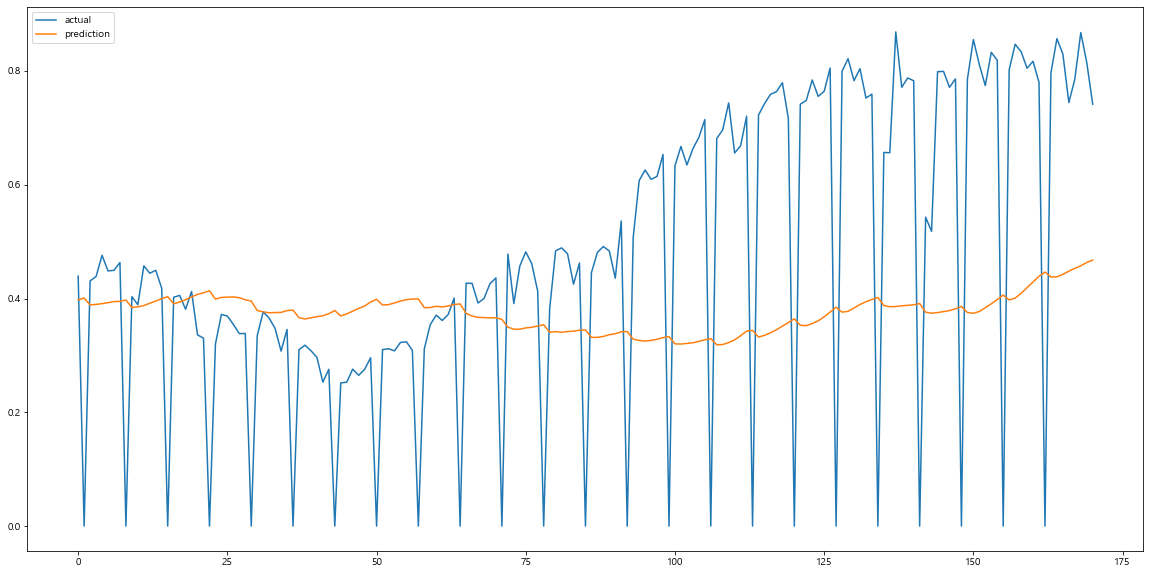

대파_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
Tra

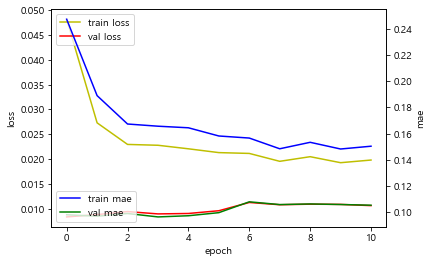

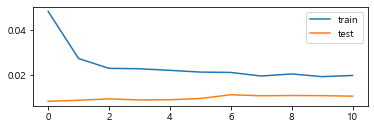

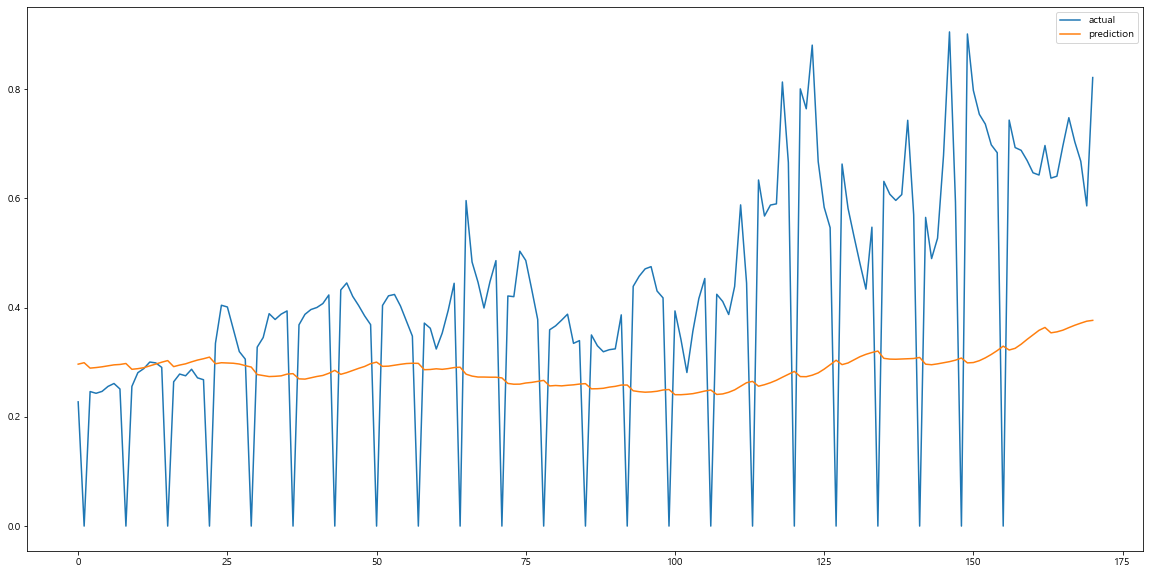

얼갈이배추_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369


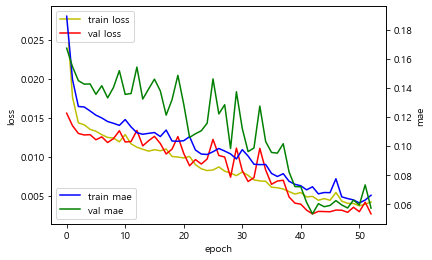

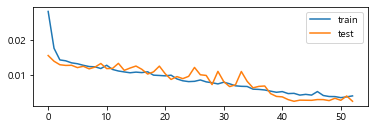

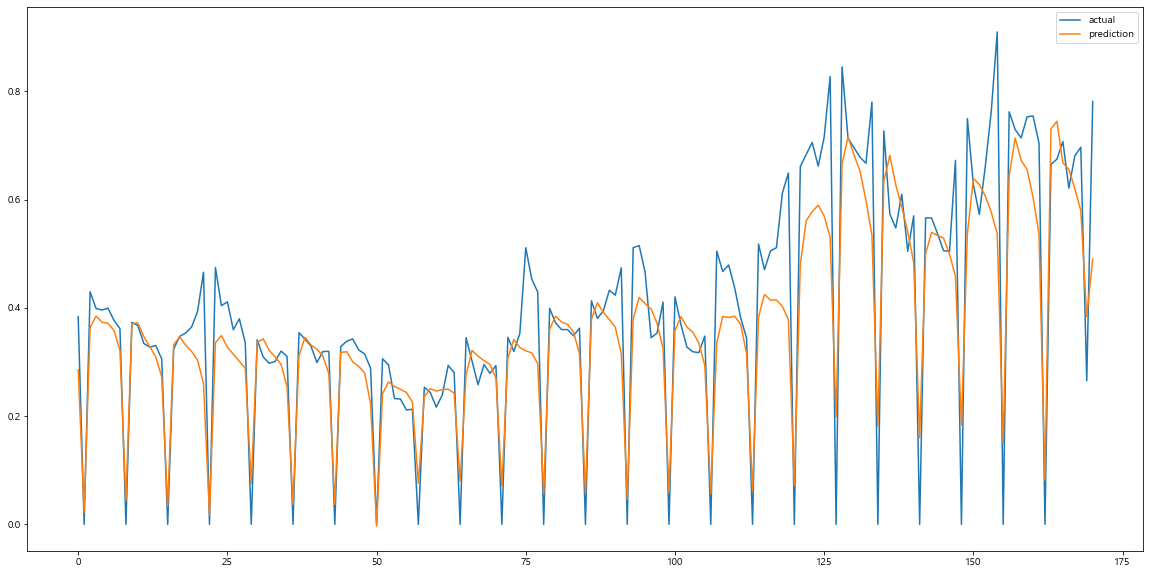

양배추_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
Tr

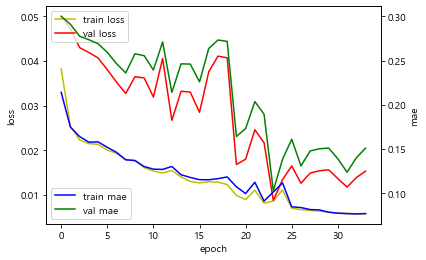

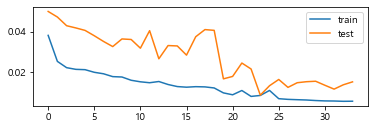

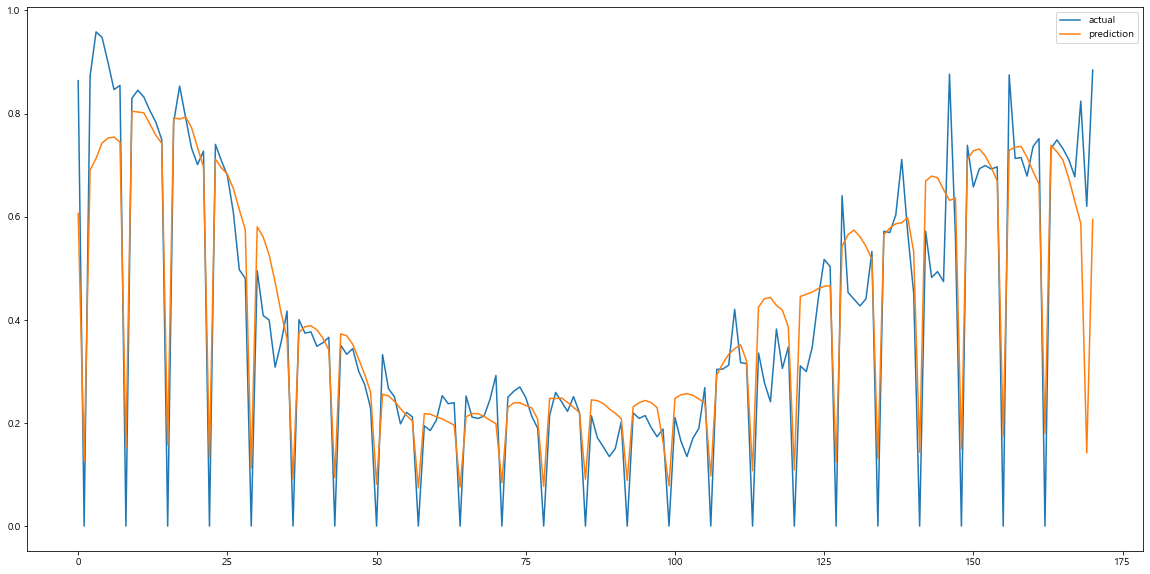

깻잎_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
Tra

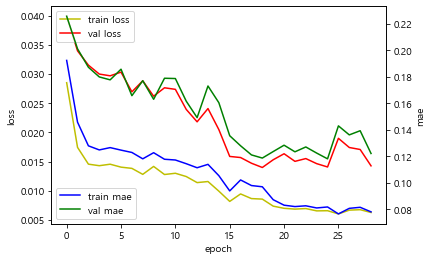

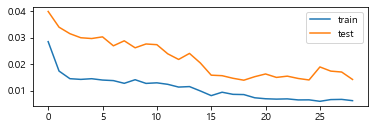

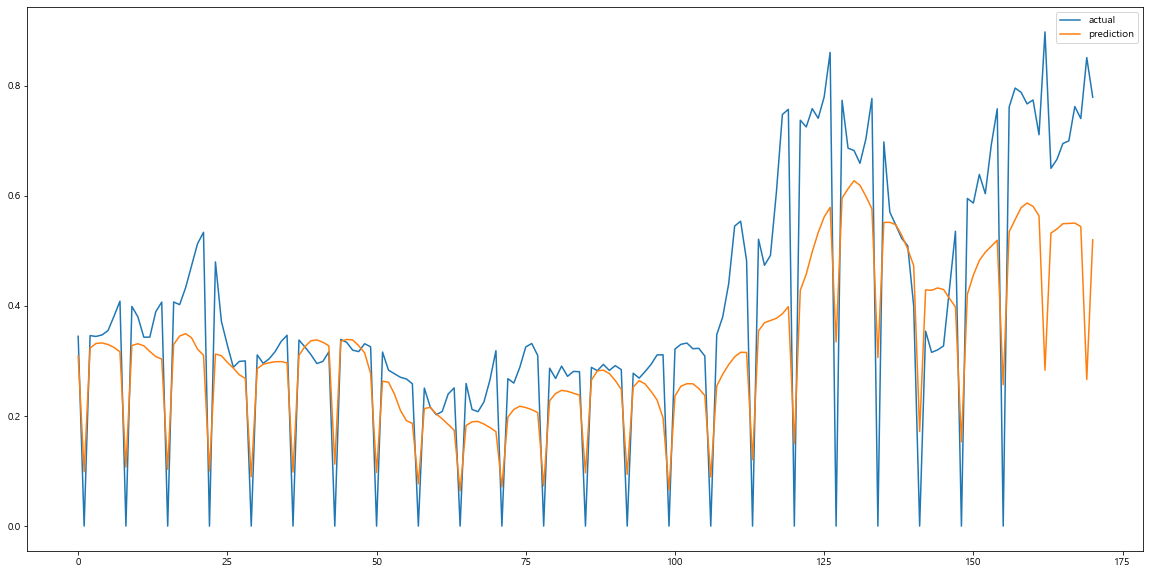

시금치_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
Tr

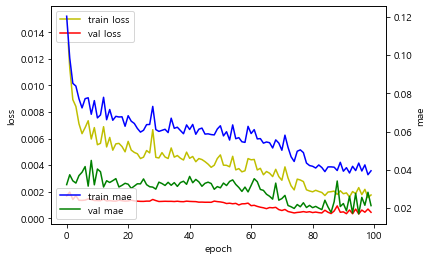

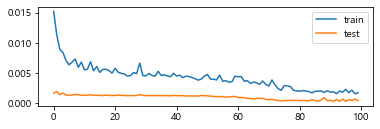

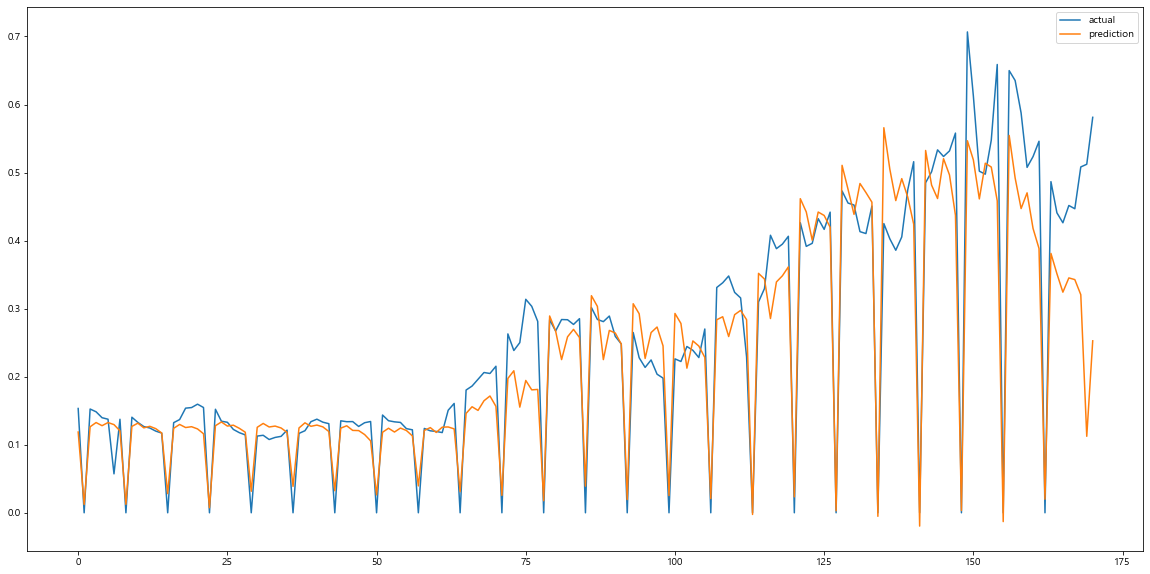

미나리_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
Tr

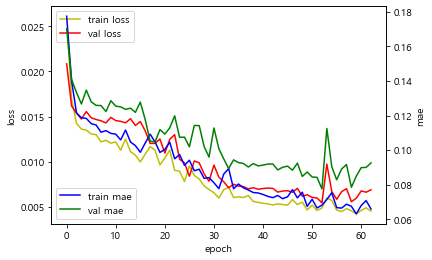

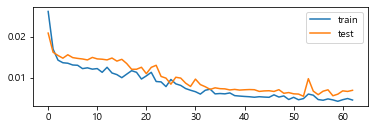

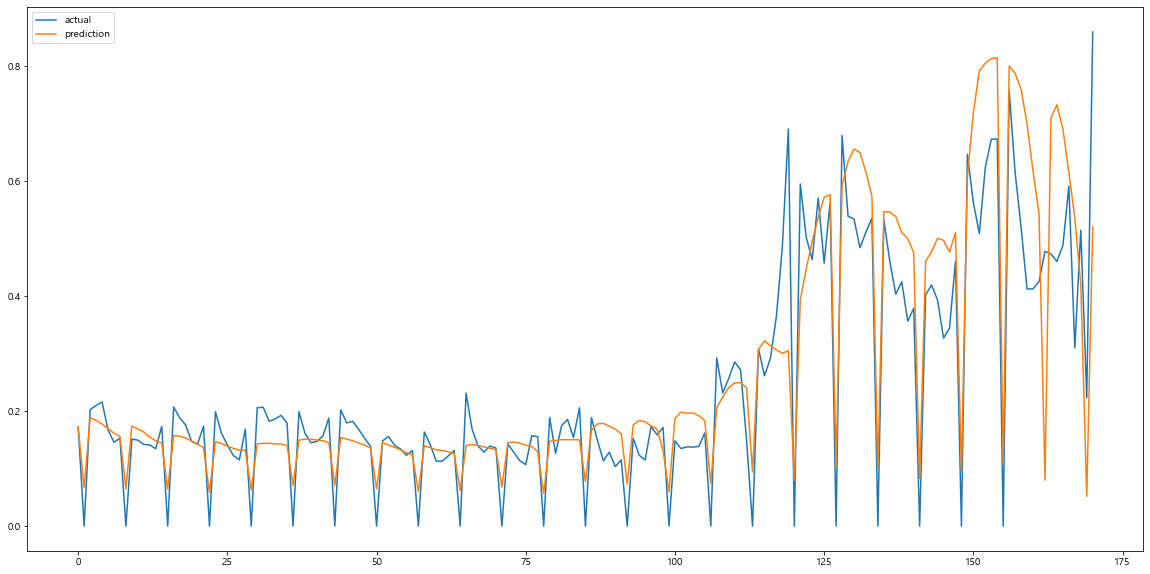

당근_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
Tra

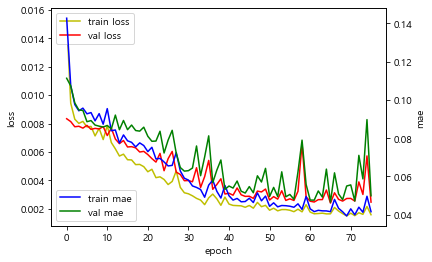

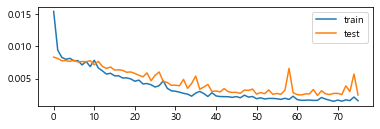

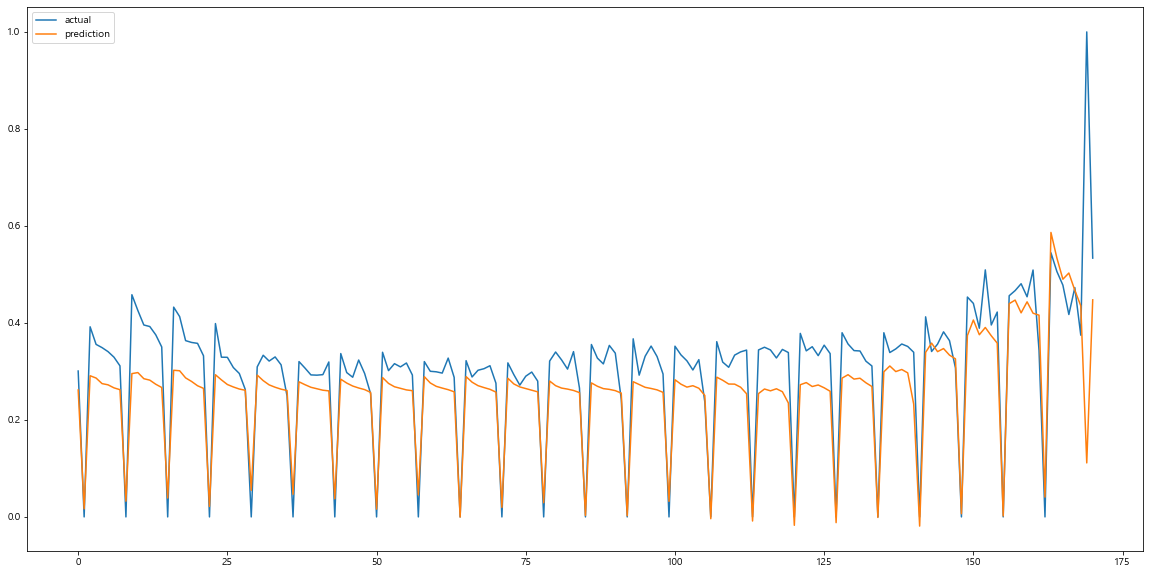

파프리카_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
T

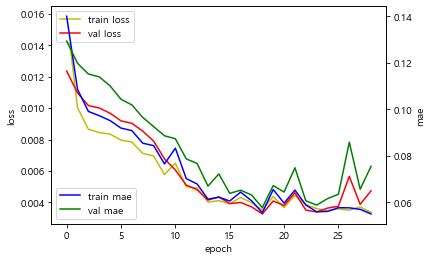

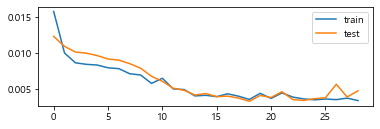

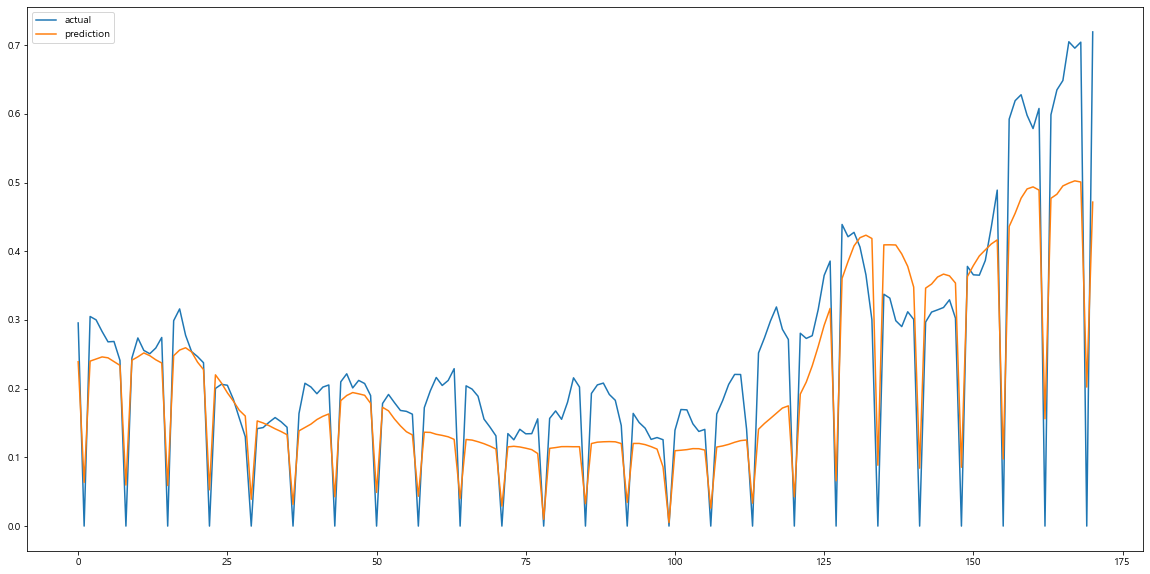

새송이_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
Tr

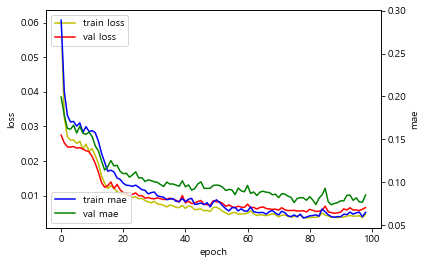

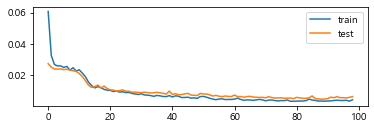

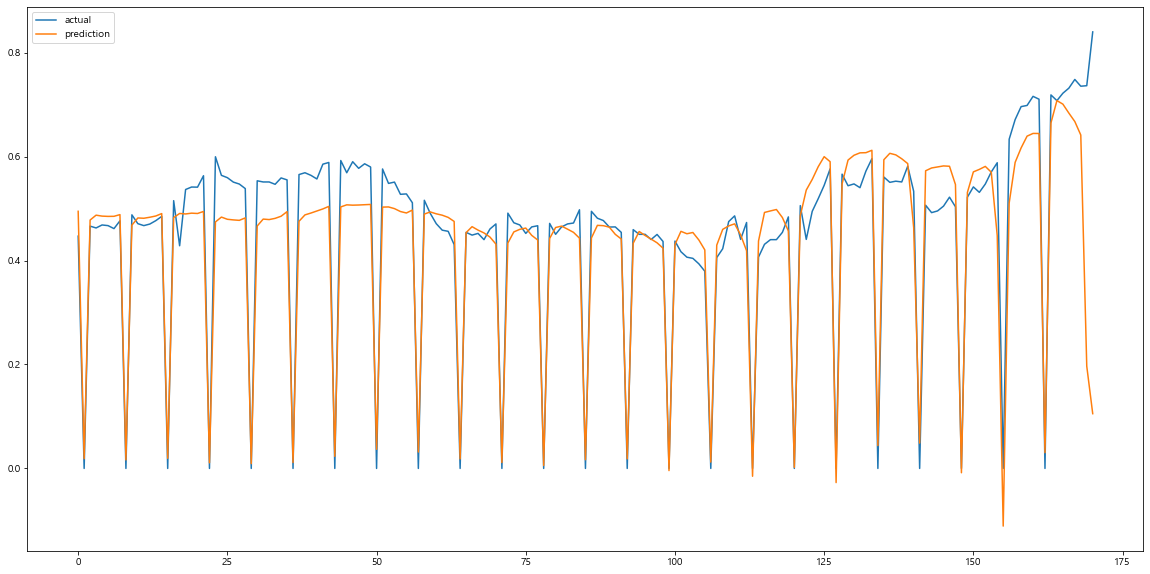

팽이버섯_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
T

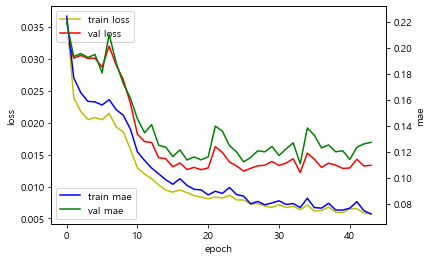

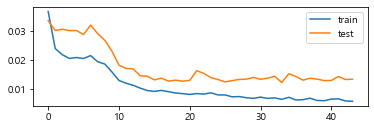

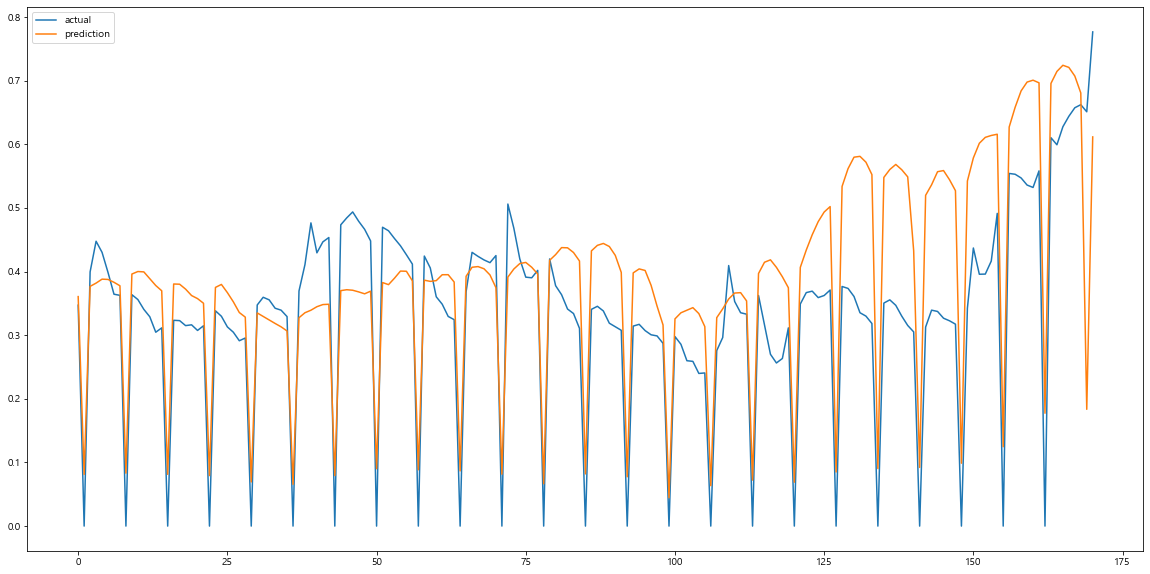

토마토_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
Tr

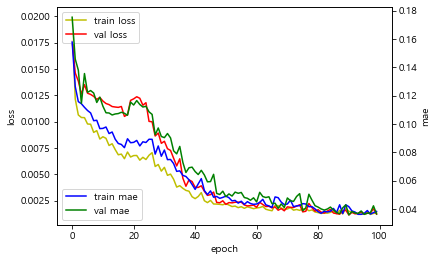

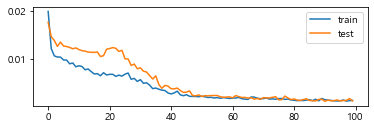

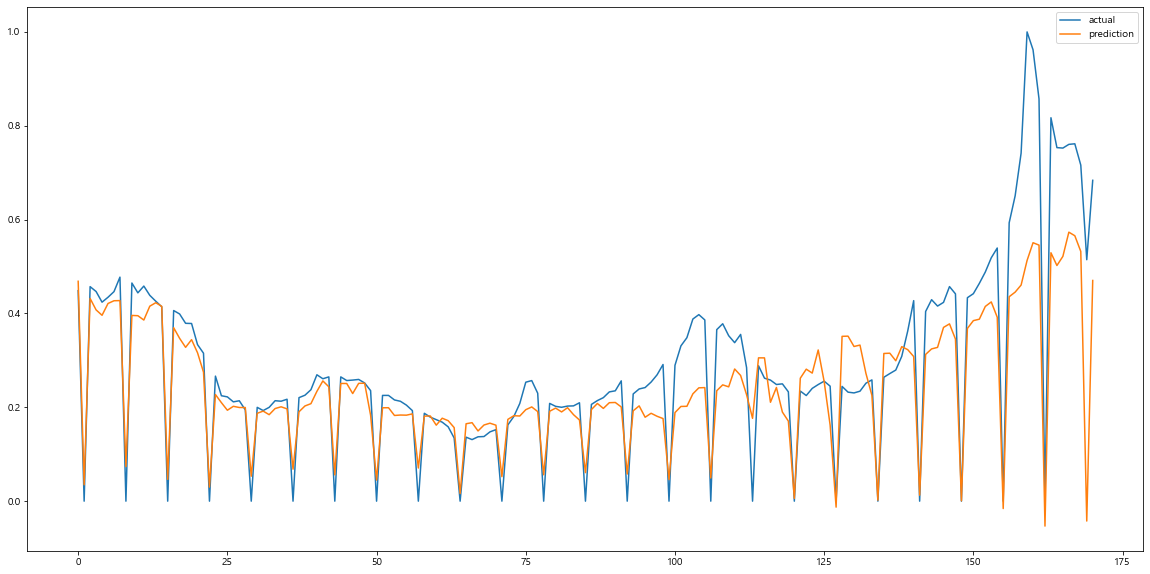

청상추_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
Tr

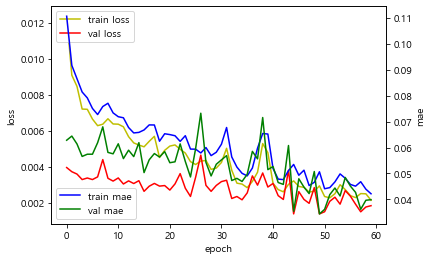

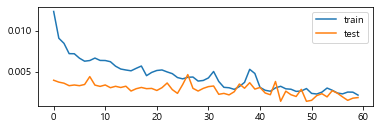

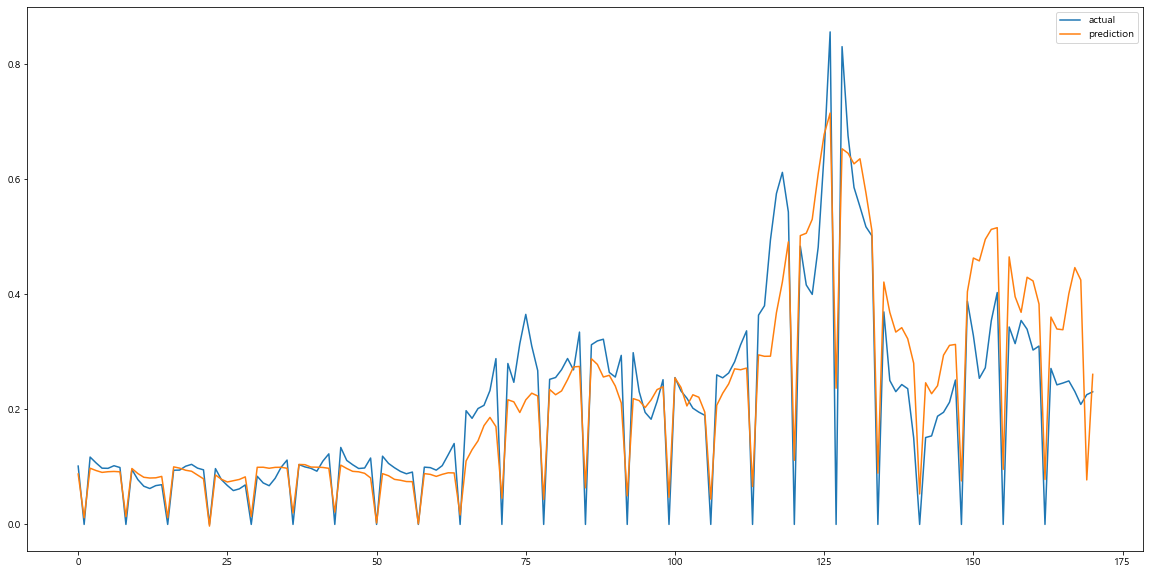

백다다기_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
T

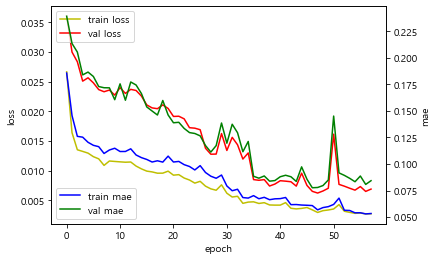

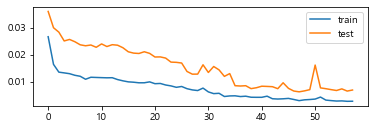

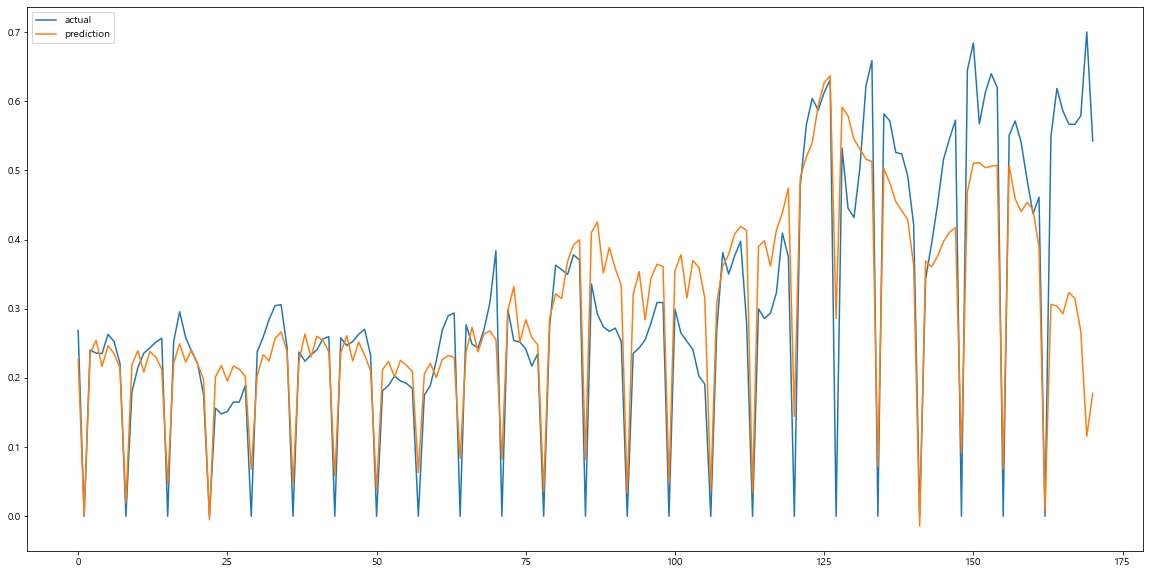

애호박_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
Tr

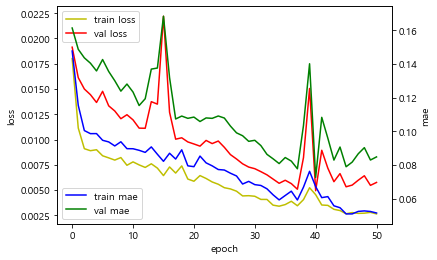

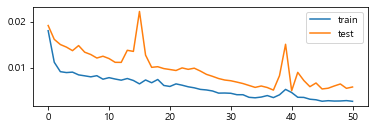

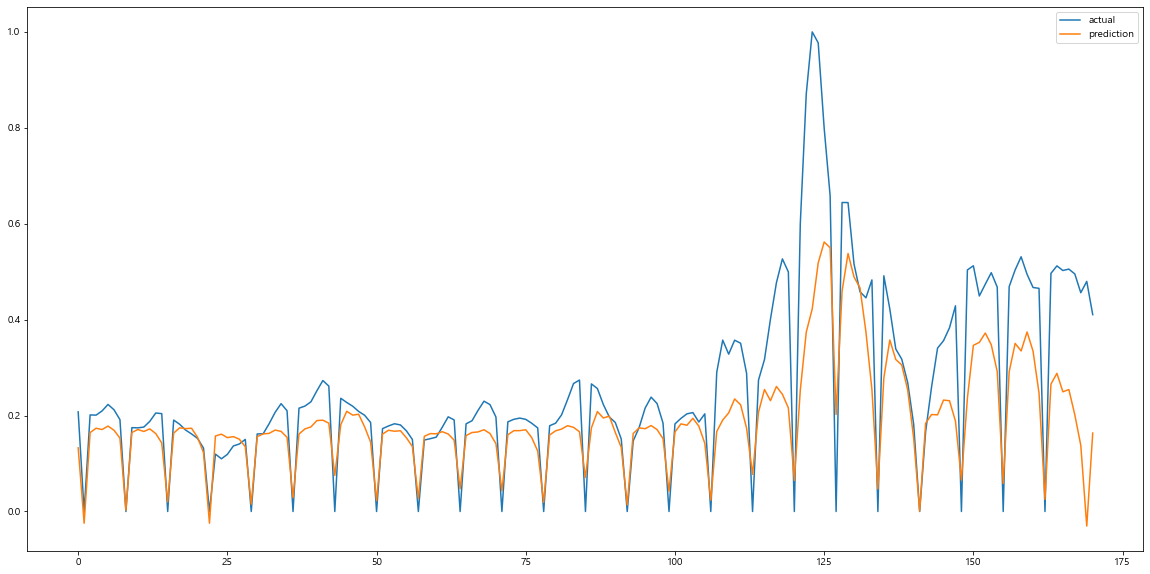

캠벨얼리_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
T

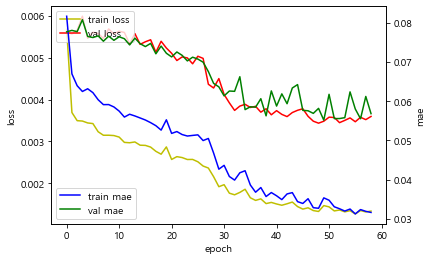

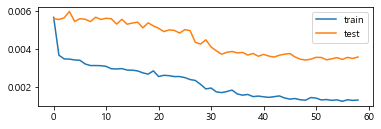

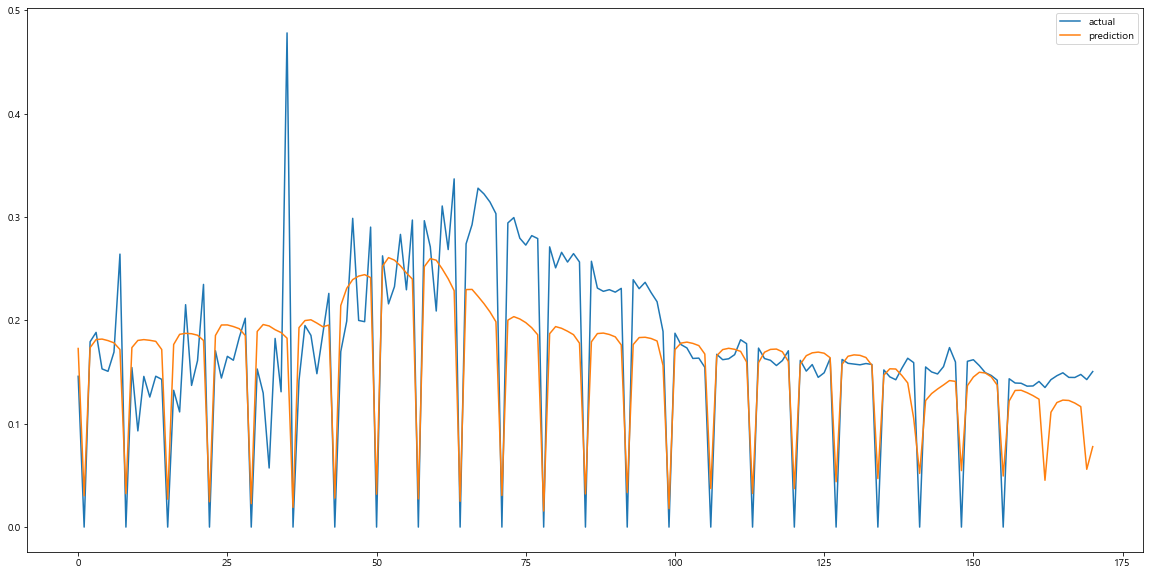

샤인마스캇_가격(원/kg)_tg LSTM 예측 모델 
(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369


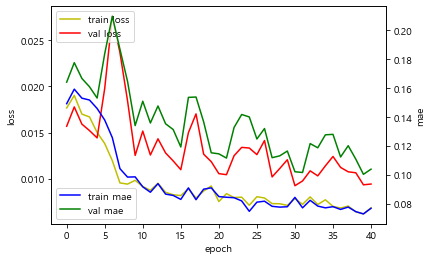

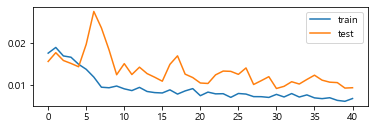

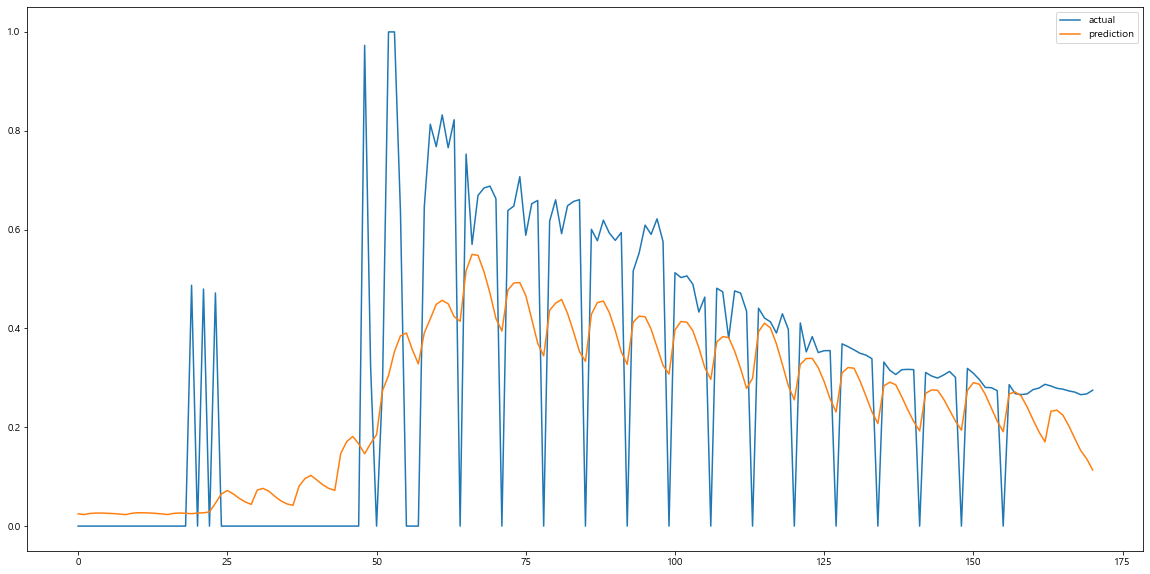

In [ ]:
# LSTM 예측 모델
for col in label_col_list:
    print("="*100)
    print("{0} LSTM 예측 모델 ".format(col))
    print("="*100)
    seed_init(1031)
    # 입력값과 출력값으로 분리
    # train_X, train_y = train_df.iloc[:, :features_len * WINDOW_SIZE], train_df.loc[:,label_col_list[0]]
    # val_X, val_y = val_df.iloc[:, :features_len * WINDOW_SIZE], val_df.loc[:,label_col_list[0]]
    # test_X, test_y = test_df.iloc[:, :features_len * WINDOW_SIZE], test_df.loc[:,label_col_list[0]]
    train_X, train_y = train_df.iloc[:, :features_len * WINDOW_SIZE], train_df.loc[:,col]
    val_X, val_y = val_df.iloc[:, :features_len * WINDOW_SIZE], val_df.loc[:,col]
    test_X, test_y = test_df.iloc[:, :features_len * WINDOW_SIZE], test_df.loc[:,col]
    #=============================================================================================== label_col_list 변경해야함.
    # 범위, 타임스탬프, 컬럼
    train_X = train_X.values.reshape((train_X.shape[0], WINDOW_SIZE, features_len))
    val_X = val_X.values.reshape((val_X.shape[0], WINDOW_SIZE, features_len))
    test_X = test_X.values.reshape((test_X.shape[0], WINDOW_SIZE, features_len))

    train_y = train_y.values.reshape((train_y.shape[0], 1))
    val_y = val_y.values.reshape((val_y.shape[0], 1))
    test_y = test_y.values.reshape((test_y.shape[0], 1))
    # print(so_train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    print(train_X.shape, train_y.shape)
    print(val_X.shape, val_y.shape)
    print(test_X.shape, test_y.shape)

    # 모델 구성 LSTM
    lstm_model = keras.Sequential([
        keras.layers.LSTM(28, activation="relu"
                        , input_shape=[WINDOW_SIZE, features_n]
                        , return_sequences=True),
        keras.layers.LSTM(28, activation="relu", return_sequences=False),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1),
        # keras.layers.Lambda(lambda x: x * 200)
    ])
    lstm_model.summary()
    lstm_model.summary()
    hist = model_complie_fit(lstm_model, train_X, train_y, val_X, val_y)
    # 저장한 데이터를 로드
    lstm_model.load_weights("best_model.h5")
    # conv_lstm_model = keras.models.load_weights("best_model.h5")
    pred = lstm_model.predict(test_X)
    val_performance_dict, performance_dict = model_perfomance_print(lstm_model, "LSTM", val_X, val_y, test_X, test_y, False)
    score = r2_score(test_y, pred)
    # test_y.shape
    print("r2 score :", r2_score(test_y, pred))

    perfomance_plot_show(hist)
    # prediction_plot_show(test_y, pred)
    # prediction_plot_show(test_y, pred)
    # test_y_df = pd.DataFrame(test_y.reshape(test_y.shape[0]*test_y.shape[1], test_y.shape[2]))
    # pred_df=pd.DataFrame(arg_pred)

    # 예측 데이터 시각화 
    plt.figure(figsize=(20, 10))
    plt.plot(test_y, label='actual')
    plt.plot(pred, label='prediction')
    plt.legend()
    plt.show()


In [ ]:
# # 입력값과 출력값으로 분리
# train_X, train_y = train_df.iloc[:, :features_len * WINDOW_SIZE], train_df.loc[:,label_col_list[0]]
# val_X, val_y = val_df.iloc[:, :features_len * WINDOW_SIZE], val_df.loc[:,label_col_list[0]]
# test_X, test_y = test_df.iloc[:, :features_len * WINDOW_SIZE], test_df.loc[:,label_col_list[0]]

# print(train_X.shape, train_y.shape)
# print(val_X.shape, val_y.shape)
# print(test_X.shape, test_y.shape)

In [ ]:
# ----------------------------------------
# 1. 파생변수 생성 / 돌린거 / 날씨 원유 경우 
# 2. 무 무컬럼만 가지고 무 가격 예측 
# 3. 웹사이트 다른 모델 층 많은거 돌리는거 
# ---------------------------------------


In [ ]:
# 범위, 타임스탬프, 컬럼
train_X = train_X.values.reshape((train_X.shape[0], WINDOW_SIZE, features_len))
val_X = val_X.values.reshape((val_X.shape[0], WINDOW_SIZE, features_len))
test_X = test_X.values.reshape((test_X.shape[0], WINDOW_SIZE, features_len))

train_y = train_y.values.reshape((train_y.shape[0], 1))
val_y = val_y.values.reshape((val_y.shape[0], 1))
test_y = test_y.values.reshape((test_y.shape[0], 1))
# print(so_train_X.shape, train_y.shape, test_X.shape, test_y.shape)
print(train_X.shape, train_y.shape)
print(val_X.shape, val_y.shape)
print(test_X.shape, test_y.shape)

(1364, 28, 43) (1364, 1)
(170, 28, 43) (170, 1)
(171, 28, 43) (171, 1)


In [ ]:
# 모델 구성 CNN + LSTM
lstm_model = keras.Sequential([
    keras.layers.LSTM(28, activation="relu"
                      , input_shape=[WINDOW_SIZE, features_n]
                      , return_sequences=True),
    keras.layers.LSTM(28, activation="relu", return_sequences=False),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1),
    # keras.layers.Lambda(lambda x: x * 200)
])
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 28)            8064      
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,369
Trainable params: 16,369
Non-trainable params: 0
____________________________________________________

In [ ]:
hist = model_complie_fit(lstm_model, train_X, train_y, val_X, val_y)

optimizer : Adam 	learning_rate:  0.0011
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x00000265328E2460>]
loss_function: [<function huber at 0x000002651EDA9550>]
metrics: mae
epochs: 100 	배치 사이즈 : 32
callbacks early_stopping: [val_loss] 	patience: [10]
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.00310, saving model to best_model.h5
43/43 - 2s - loss: 0.0059 - mae: 0.0788 - val_loss: 0.0031 - val_mae: 0.0781
Epoch 2/100

Epoch 00002: val_loss did not improve from 0.00310
43/43 - 1s - loss: 0.0037 - mae: 0.0633 - val_loss: 0.0031 - val_mae: 0.0784
Epoch 3/100

Epoch 00003: val_loss improved from 0.00310 to 0.00307, saving model to best_model.h5
43/43 - 1s - loss: 0.0033 - mae: 0.0589 - val_loss: 0.0031 - val_mae: 0.0778
Epoch 4/100

Epoch 00004: val_loss improved from 0.00307 to 0.00306, saving model to best_model.h5
43/43 - 2s - loss: 0.0031 - mae: 0.0569 - val_loss: 0.0031 - val_mae: 0.0775
Epoch 5/100

Epoch 00005: val_loss improved fro

In [ ]:
# 저장한 데이터를 로드
lstm_model.load_weights("best_model.h5")
# conv_lstm_model = keras.models.load_weights("best_model.h5")
pred = lstm_model.predict(test_X)

In [ ]:
val_performance_dict, performance_dict = model_perfomance_print(lstm_model, "LSTM", val_X, val_y, test_X, test_y, False)

6/6 - 0s - loss: 0.0011 - mae: 0.0409
6/6 - 0s - loss: 0.0030 - mae: 0.0574
검증 데이터로 예측모델 평가:  [0.0011223794426769018, 0.040930312126874924]
테스트 데이터로 예측모델 평가 [0.003036090172827244, 0.0574372224509716]


In [ ]:
# lstm_pred=pred.reshape(171, 1, 28)
# lstm_pred=lstm_pred.reshape(171*1, 28)
# lstm_pred.shape, test_y.shape

In [ ]:
test_y.shape, pred.shape

((171, 1), (171, 1))

In [ ]:
# test_y.shape
print("r2 score :", r2_score(test_y, pred))

r2 score : 0.500939442972274


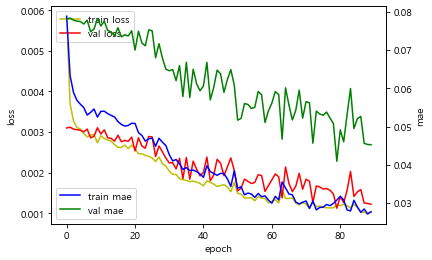

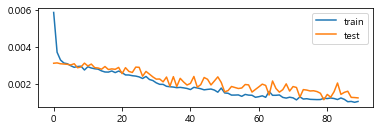

In [ ]:
perfomance_plot_show(hist)
# prediction_plot_show(test_y, pred)

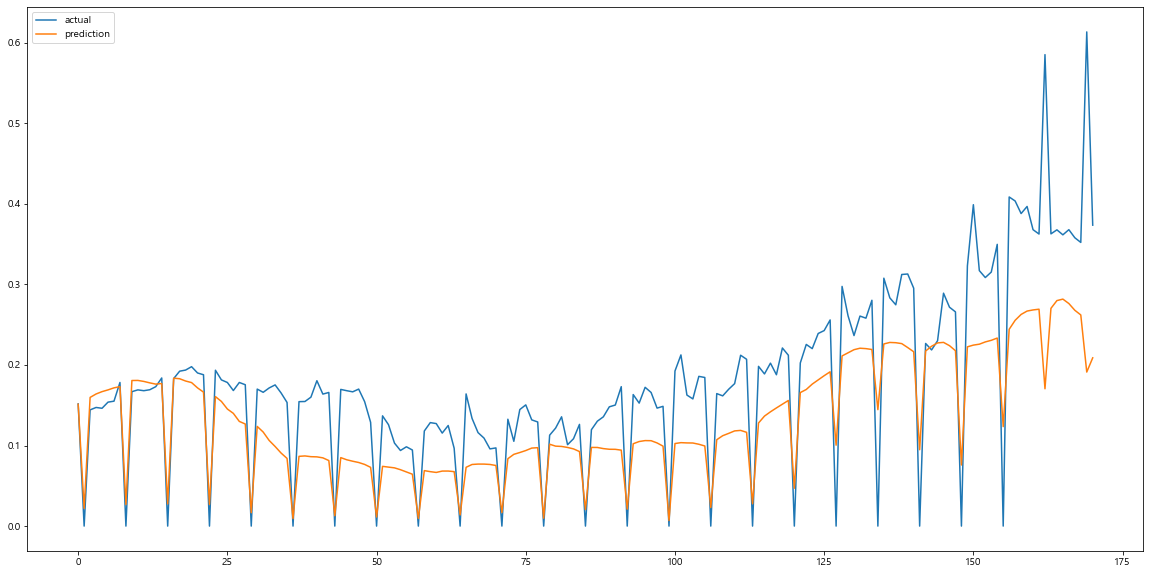

In [ ]:
# prediction_plot_show(test_y, pred)
# test_y_df = pd.DataFrame(test_y.reshape(test_y.shape[0]*test_y.shape[1], test_y.shape[2]))
# pred_df=pd.DataFrame(arg_pred)
    
# 예측 데이터 시각화 
plt.figure(figsize=(20, 10))
plt.plot(test_y, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
# val_performance = {}
# performance = {}
# val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
# performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

In [ ]:
conv_lstm_model.metrics_names.index('mae')

1

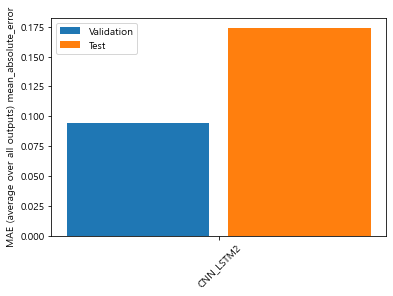

In [ ]:
x = np.arange(len(performance_dict))
width = 0.3
# metric_name = 'mean_absolute_error'
metric_name = 'mean_absolute_error'
# metric_index = conv_lstm_model.metrics_names.index('mean_absolute_error')
metric_index = conv_lstm_model.metrics_names.index('mae')
val_mae = [v[metric_index] for v in val_performance_dict.values()]
test_mae = [v[metric_index] for v in performance_dict.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance_dict.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs) mean_absolute_error')
_ = plt.legend()

In [ ]:
for name, value in performance_dict.items():
  print(f'{name:12s}: {value[1]:0.4f}')

CNN_LSTM2   : 0.1736


In [ ]:
# 다중 input -> output 1 일때 